# Global Power Plant Database

# Aim: 


Need To Predict Primary Fuel And Capacity_mw For Global Power Plant Dataset.

# Problem Statment:


An affordable, reliable, and environmentally sustainable power sector is central to modern society. Governments, utilities, and companies make decisions that both affect and depend on the power sector. For example, if governments apply a carbon price to electricity generation, it changes how plants run and which plants are built over time. On the other hand, each new plant affects the electricity generation mix, the reliability of the system, and system emissions. Plants also have significant impact on climate change, through carbon dioxide (CO2) emissions; on water stress, through water withdrawal and consumption; and on air quality, through sulfur oxides (SOx), nitrogen oxides (NOx), and particulate matter (PM) emissions.

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

But in our study we will be working on the dataset only for INDIA. The data set contains only 908 rows and 25 columns. The data set provides information of all the power plant situated at diffrent loactions in india.

# The database includes the following indicators:



country (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5] country_long (text): longer form of the country designation name (text): name or title of the power plant, generally in Romanized form gppd_idnr (text): 10 or 12 character identifier for the power plant capacity_mw (number): electrical generating capacity in megawatts latitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326) longitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326) primary_fuel (text): energy source used in primary electricity generation or export other_fuel1 (text): energy source used in electricity generation or export other_fuel2 (text): energy source used in electricity generation or export other_fuel3 (text): energy source used in electricity generation or export commissioning_year (number): year of plant operation, weighted by unit-capacity when data is available owner (text): majority shareholder of the power plant, generally in Romanized form source (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form url (text): web document corresponding to the source field geolocation_source (text): attribution for geolocation information wepp_id (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database. year_of_capacity_data (number): year the capacity information was reported generation_data_source (text): attribution for the reported generation information generation_gwh_2013 (number): electricity generation in gigawatt-hours reported for the year 2013 generation_gwh_2014 (number): electricity generation in gigawatt-hours reported for the year 2014 generation_gwh_2015 (number): electricity generation in gigawatt-hours reported for the year 2015 generation_gwh_2016 (number): electricity generation in gigawatt-hours reported for the year 2016 generation_gwh_2017 (number): electricity generation in gigawatt-hours reported for the year 2017 generation_gwh_2018 (number): electricity generation in gigawatt-hours reported for the year 2018 generation_gwh_2019 (number): electricity generation in gigawatt-hours reported for the year 2019 estimated_generation_gwh_2013 (number): estimated electricity generation in gigawatt-hours for the year 2013 estimated_generation_gwh_2014 (number): estimated electricity generation in gigawatt-hours for the year 2014 estimated_generation_gwh_2015 (number): estimated electricity generation in gigawatt-hours for the year 2015 estimated_generation_gwh_2016 (number): estimated electricity generation in gigawatt-hours for the year 2016 estimated_generation_gwh_2017 (number): estimated electricity generation in gigawatt-hours for the year 2017 estimated_generation_note_2013 (text): label of the model/method used to estimate generation for the year 2013 estimated_generation_note_2014 (text): label of the model/method used to estimate generation for the year 2014 estimated_generation_note_2015 (text): label of the model/method used to estimate generation for the year 2015 estimated_generation_note_2016 (text): label of the model/method used to estimate generation for the year 2016 estimated_generation_note_2017 (text): label of the model/method used to estimate generation for the year 2017

Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories.

Prediction : Make two prediction for labels

- Primary Fuel
- capacity_mw

# Lets import all the required library:



In [1]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as  np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


#clssification 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling  import SMOTE
from sklearn.model_selection import GridSearchCV

#Regression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

Importing all the necessary libraries initially.



# Loading Dataset:


In [2]:
df=pd.read_csv('Global Power Plant Database')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


With the help of pandas library we have imported the csv file into jupyter notebook. This dataset is having 907 columns and 27 rows.The utmost important point is in our dataset we have been asked to predict two label . namely 1.primary_fuel 2.capacity_mw. As far as we can see that our first level primary fuel is having catagorical data so we can say this is our classificatin model. and second capacity_mw is having continous data we will make Regression model .

In [3]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

The dataset has 907 rows and 27 columns

We can see that the dataset is comprised of 27 columns including two target variables capacity_mw and primary_fuel where we need to predict both capacity_mw (Continuous Target Variable) and Fuel Type (Categorical Target Variable) on seperate Regression and Classification Models.

# Exploratory Data Analysis


In [4]:
#getting the shape of the dataset.
df.shape

(907, 27)

we have 907 rows and 27 columns



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

From data information we can see
Data having 907 columns and 27 Rows
Out of 27, 15 columns are float data type and 12 columns are Oject data type
Data is having missing values also in many columns.
for exatct count lets check the null values present in the data.

In [11]:
#checking of the data types of the dataset
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

The features that needs encoding are country, country_long, name, gppd_idnr,Fuel_Type,other_fuel1,other_fuel2, owner, source, url, geolocation_source,generation_data_source as they are object data type and the ML model needs numeric datatype.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
capacity_mw,907.0,326.223755,590.085456,0.0000,16.725000,59.200000,385.250000,4760.000
latitude,861.0,21.197918,6.239612,8.1689,16.773900,21.780000,25.512400,34.649
longitude,861.0,77.464907,4.939316,68.6447,74.256200,76.719500,79.440800,95.408
other_fuel3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
commissioning_year,527.0,1997.091082,17.082868,1927.0000,1988.000000,2001.000000,2012.000000,2018.000
wepp_id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_of_capacity_data,519.0,2019.000000,0.000000,2019.0000,2019.000000,2019.000000,2019.000000,2019.000
generation_gwh_2013,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2014,398.0,2431.823590,4026.440035,0.0000,223.557672,801.123775,3035.306250,28127.000
generation_gwh_2015,422.0,2428.226946,4194.596959,0.0000,176.381063,711.181225,3084.121250,30539.000


As we have seen earlier that there are 907 columns in the dataset,only capacity_mw is having full 907 values.That means there is missing values in almost all the columns.

The interquartile ranges of the longitude column is not perfect,there may be skewness in the dataset.

There is no values in other_fuel3 column.we will delete this column before building model.

There is no values in wepp_id column.we will delete this column before building model.

The Year of capacity data contains same values.

estimated_generation_gwh have mising values.

generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017 will be having skewness and outliers because the minimum values are zero which is lesser than standard deviation.

In [7]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

Here we can see most of the data columns are having missing values
In some columns we have colplete missing data
latitude and longitude have 46 missing values
other_fuel1, other_fuel2 and other_fuel3 are having large number of missing values
commissioning_year year have 380 nul values and oweners information also missing
wepp_id is completely missing
some of the importtant columns having missing values near about 500, we will decide later, we need to drop or fill the colums.

# Filling the null values


In [8]:
# filling the missing values of the numerical columns:

df['latitude'] = df['latitude'].fillna(df['latitude'].mean())
df['longitude'] = df['longitude'].fillna(df['longitude'].mean())
df['commissioning_year'] = df['commissioning_year'].fillna(df['commissioning_year'].mean())
df['wepp_id'] = df['wepp_id'].fillna(df['wepp_id'].mean())
df['year_of_capacity_data'] = df['year_of_capacity_data'].fillna(df['year_of_capacity_data'].mean())
df['generation_gwh_2013'] = df['generation_gwh_2013'].fillna(df['generation_gwh_2013'].mean())
df['generation_gwh_2014'] = df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].mean())
df['generation_gwh_2015'] = df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].mean())
df['generation_gwh_2016'] = df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].mean())
df['generation_gwh_2017'] = df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].mean())
df['generation_gwh_2018'] = df['generation_gwh_2018'].fillna(df['generation_gwh_2018'].mean())
df['generation_gwh_2019'] = df['generation_gwh_2019'].fillna(df['generation_gwh_2019'].mean())
df['estimated_generation_gwh'] = df['estimated_generation_gwh'].fillna(df['estimated_generation_gwh'].mean())
df['other_fuel3'] = df['other_fuel3'].fillna(df['other_fuel3'].mean())

filled all the missing vqalues to numerical columns by using mean method



In [9]:
#filling the missing values of the categorical columns:
df['generation_data_source'] = df['generation_data_source'].fillna(df['generation_data_source'].mode()[0])
df['geolocation_source'] = df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])
df['other_fuel1'] = df['other_fuel1'].fillna(df['other_fuel1'].mode()[0])
df['other_fuel2'] = df['other_fuel2'].fillna(df['other_fuel2'].mode()[0])
df['owner'] = df['owner'].fillna(df['owner'].mode()[0])

Filled the missing values of the categorical columns with mode function



In [10]:
# again finding for null values 
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
other_fuel1                   0
other_fuel2                   0
other_fuel3                 907
commissioning_year            0
owner                         0
source                        0
url                           0
geolocation_source            0
wepp_id                     907
year_of_capacity_data         0
generation_gwh_2013         907
generation_gwh_2014           0
generation_gwh_2015           0
generation_gwh_2016           0
generation_gwh_2017           0
generation_gwh_2018           0
generation_gwh_2019         907
generation_data_source        0
estimated_generation_gwh    907
dtype: int64

All the columns are filled in the null values except other_fuel3,wepp_id and estimated_generation_gwh because we have seen earlier in the statistical summary that this columns have no data at all ,so mean or mode function is not working.we will remove this column before creating the model.

In [12]:
# Checking number of unique values in each column
df.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    837
longitude                   828
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           74
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         372
generation_gwh_2015         397
generation_gwh_2016         404
generation_gwh_2017         409
generation_gwh_2018         411
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

Here the columns country, country_long, other_fuel2, year_of_capacity_data and generation_data_source have only one unique value. Also other_fuel3, wepp_id,generation_gwh_2013, generation_gwh_2019, estimated_generation_gwh have no unique values which means they are filled with only NAN values. Since these columns have same entries thoughout the dataset so we can drop these columns.

# Feature Selection


ountry, country_long, other_fuel2, year_of_capacity_data and generation_data_source

other_fuel3, wepp_id,generation_gwh_2013, generation_gwh_2019, estimated_generation_gwh

In [13]:
# Checking the count of the country
df["country"].value_counts()

IND    907
Name: country, dtype: int64

We see that only IND is listed in the country hence there is no impact of this feature on prediction



In [14]:
# Checking the count of the country_long
df["country_long"].value_counts()

India    907
Name: country_long, dtype: int64

In [15]:
df.drop(columns=["country","country_long"],axis=1,inplace=True)

In [16]:
# Checking the count of other_fuel2
df["other_fuel2"].value_counts()

Oil    907
Name: other_fuel2, dtype: int64

We see that only Oil is listed in the other_fuel2 and rest are all 906 null values hence there is no impact of this feature on prediction



In [17]:
# Checking the count of year_of_capacity_data
df["year_of_capacity_data"].value_counts()

2019.0    907
Name: year_of_capacity_data, dtype: int64

year_of_capacity_data has only 2019 listed value and 388 null values hence there is no impact of this feature on prediction



In [18]:
# Checking the count of generation_data_source
df["generation_data_source"].value_counts()

Central Electricity Authority    907
Name: generation_data_source, dtype: int64

generation_data_source has only Central Electricity Authority as listed value and 458 null values hence there is no impact of this feature on prediction



In [19]:
# Checking the count of other_fuel3
df["other_fuel3"].value_counts()

Series([], Name: other_fuel3, dtype: int64)

other_fuel3 has all values as null values hence dropping this column



In [20]:
# Checking the count of wepp_id
df["wepp_id"].value_counts()

Series([], Name: wepp_id, dtype: int64)

wepp_id has all values as null values hence dropping this column



In [21]:
# Checking the count of generation_gwh_2013
df["generation_gwh_2013"].value_counts()

Series([], Name: generation_gwh_2013, dtype: int64)

generation_gwh_2013 has all values as null values hence dropping this column



In [22]:
# Checking the count of generation_gwh_2019
df["generation_gwh_2019"].value_counts()

Series([], Name: generation_gwh_2019, dtype: int64)

generation_gwh_2019 has all values as null values hence dropping this column



In [23]:
# Checking the count of generation_gwh_2019
df["estimated_generation_gwh"].value_counts()

Series([], Name: estimated_generation_gwh, dtype: int64)

estimated_generation_gwh has all values as null values hence dropping this column



In [25]:
df.drop(columns=["other_fuel2","year_of_capacity_data","generation_data_source","other_fuel3","wepp_id","generation_gwh_2013","generation_gwh_2019","estimated_generation_gwh"],axis=1,inplace=True)


In [26]:
df

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,Oil,2011.000000,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,Oil,1997.091082,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,Oil,1997.091082,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,Oil,2004.000000,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.000000,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.000000,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2431.823590,0.994875,233.596650,865.400000,686.500000
903,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,Oil,1997.091082,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,Oil,1997.091082,Acc Acc ltd,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
905,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,Oil,1997.091082,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


In [27]:
df.columns

Index(['name', 'gppd_idnr', 'capacity_mw', 'latitude', 'longitude',
       'primary_fuel', 'other_fuel1', 'commissioning_year', 'owner', 'source',
       'url', 'geolocation_source', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018'],
      dtype='object')

In [28]:
# Checking the count of name
df["name"].value_counts()

ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64

In [29]:
# Checking the count of gppd_idnr
df["gppd_idnr"].value_counts()

WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64

In [30]:
# Checking the count of owner
df["owner"].value_counts()

Acc Acc ltd                                                    569
Sterling Agro Industries ltd.                                    4
Jk Cement ltd                                                    4
Maharashtra State Power Generation Co Ltd (MAHAGENCO)            3
Karnataka Power Corporation Limited                              3
                                                              ... 
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Energy Infratech Private Limited                                 1
K. N. Ram                                                        1
iEnergy Wind Farms                                               1
Name: owner, Length: 280, dtype: int64

In [31]:
# Checking the count of url
df["url"].value_counts()

http://www.cea.nic.in/                                                              519
http://www.lancosolar.com/pdfs/rajasthan-pv-project-details.pdf                       7
http://www.ntpc.co.in                                                                 6
http://viainfotech.biz/Biomass/theme5/document/green_market/REC-project-list.pdf      5
http://www.mahaurja.com/PDF/PG2_GridConnSPPCommissioned.pdf                           4
                                                                                   ... 
https://cdm.unfccc.int/Projects/DB/LRQA%20Ltd1346322352.66/view                       1
https://cdm.unfccc.int/Projects/DB/DNV-CUK1351166669.28/view                          1
http://harshaengineers.com                                                            1
http://hiragroup.com/companies/godawari-green-energy-limited/                         1
https://cdm.unfccc.int/Projects/DB/RWTUV1345031355.85/view                            1
Name: url, Length: 304, dtype: i

The columns "name", "gppd_idnr", "owner", "url" are all unique values and there is no impact of this feature on prediction hence we can drop these features



In [32]:
df.drop(columns=["name","gppd_idnr","owner","url"],axis=1,inplace=True)

In [33]:
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,Oil,2011.000000,National Renewable Energy Laboratory,National Renewable Energy Laboratory,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,24.7663,74.6090,Coal,Oil,1997.091082,Ultratech Cement ltd,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,21.9038,69.3732,Wind,Oil,1997.091082,CDM,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,23.8712,91.3602,Gas,Oil,2004.000000,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,Oil,2015.000000,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,Oil,2016.000000,Central Electricity Authority,WRI,2431.823590,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,Solar,Oil,1997.091082,Karnataka Power Corporation Limited,Industry About,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,25.5,15.2758,75.5811,Wind,Oil,1997.091082,CDM,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
905,80.0,24.3500,73.7477,Coal,Oil,1997.091082,Hindustan Zinc ltd,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


In [34]:
df.shape

(907, 13)

In [35]:
# Checking null values again after feature selection
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

<AxesSubplot:>

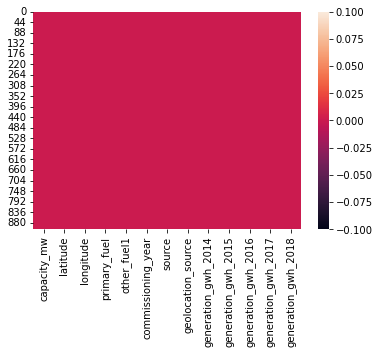

In [36]:
# Let's visualize the null values clearly
sns.heatmap(df.isnull())

We can clearly observe there is no null values





In [37]:
#Checking the skewness of the dataset
df.skew().sort_values()

commissioning_year    -1.399359
latitude              -0.149698
longitude              1.141881
capacity_mw            3.123576
generation_gwh_2018    4.937907
generation_gwh_2014    5.035446
generation_gwh_2016    5.068427
generation_gwh_2017    5.110952
generation_gwh_2015    5.364134
dtype: float64

In [38]:
# Checking the count of other_fuel1
df["other_fuel1"].value_counts()

Oil             904
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

# Treating null values using imputation techniques.


Checking the mean and mode values of the features having null values, so that we can fill the null values


In [39]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [40]:
#checking the mean of latitude
df['latitude'].mean()

21.1979181184669

In [41]:
#checking the mode of other_fuel1 
df["other_fuel1"].mode()

0    Oil
dtype: object

In [42]:
#checking the mode of geolocation_source columns
df["geolocation_source"].mode()

0    WRI
dtype: object

In [43]:
# Checking the list of counts of capacity_mw
df['capacity_mw'].value_counts()

5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64

# Feature Extraction


In [46]:
# Checking the list of counts of commissioning_year
df['commissioning_year'].value_counts()

1997.091082    380
2015.000000     28
2013.000000     25
2012.000000     23
2016.000000     19
              ... 
1946.000000      1
1956.000000      1
1937.000000      1
1949.000000      1
1953.000000      1
Name: commissioning_year, Length: 74, dtype: int64

In [47]:
# Let's extract power plant age from commissioning year by subtracting it from the year 2018
df["Power_plant_age"] = 2018 - df["commissioning_year"]
df.drop(columns=["commissioning_year"], inplace = True)

I have extracted Power plant age from commissioning year and dropped commissioning year columns. From Power plant age we can get to know how old are the power plants.

In [48]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,7.000000
1,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,20.908918
2,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,20.908918
3,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,14.000000
4,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,3.000000


# Statistical Summary


In [49]:
df.describe()

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.464907,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,20.908918
std,590.085456,6.079148,4.812291,2665.338608,2859.349132,2877.890004,2921.502193,3030.808041,13.016360
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1211.362750,916.000000,896.500214,882.594850,824.842340,15.000000
50%,59.200000,21.281800,76.979200,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,20.908918
75%,385.250000,25.176450,79.206100,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,20.908918
max,4760.000000,34.649000,95.408000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,91.000000


Here we can see the statistical analysis of the dataset (numerical only)

We can observe that the count of the columns are same, which means the dataset is balanced. The minimum capacity of the power plant is zero and maximum in 4760 and there is huge difference in mean and standard deviation.From the difference between maximum and 75% percentile we can infer that there are huge outliers present in most of the columns, will remove them using appropriate methods before building our model.

In [50]:
#checking the categorical columns
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']


In [51]:
#checking the numeric columns for visualization
num_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        num_col.append(i)
print(num_col)

['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'Power_plant_age']


# Data Visualization


In [52]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'source', 'geolocation_source', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018', 'Power_plant_age'],
      dtype='object')

In [54]:
# Let's define primary_fuel as Fuel_Type to understand the dataset in a better way
df.rename(columns={'primary_fuel':'Fuel_Type'},inplace=True)

# Univariate Analysis

# Categorical column visualization


Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: Fuel_Type, dtype: int64


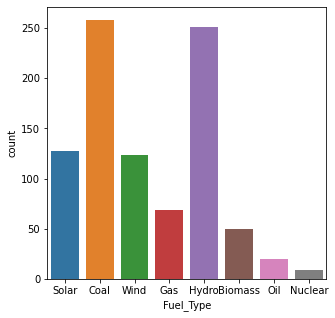

In [55]:
print(df['Fuel_Type'].value_counts())   #visualizing the fuel types in Fuel_Type
plt.figure(figsize=(5,5))
sns.countplot(df['Fuel_Type'])
plt.show()

In the above count plot for "primary_fuel" column we can see that the highest number of values have been covered by coal and hydro fuel types then comes solar and wind. Finally we see that gas, biomass, oil and nuclear have very low data counts.

However when we will be considering "primary_fuel" as our target label then this is impose a class imbalance issue while trying to create a classification model and therefore will need to be treated accordingly.

Oil             904
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


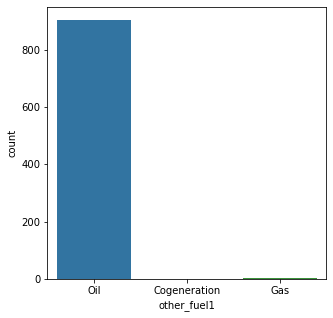

In [56]:
#checking the count of fuel1
print(df['other_fuel1'].value_counts())
plt.figure(figsize=(5,5))
sns.countplot(df['other_fuel1'])
plt.show()

It can be observed that 'other_fuel1' type has 3 unique types namely: 'Oil', 'Cogeneration other fuel', 'Gas'. And it is clearly seen that oil is the max used fuel type.



WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


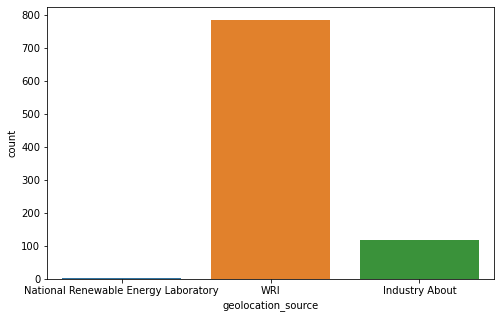

In [57]:
# Visualizing the counts of owner
print(df["geolocation_source"].value_counts())
labels='WRI','Industry About','National Renewable Energy Laboratory'
plt.figure(figsize=(8,5))
sns.countplot(df['geolocation_source'])
plt.show()

Here it can be seen that the count of WRI is the max, which means that the max information is shared by this source.



5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64


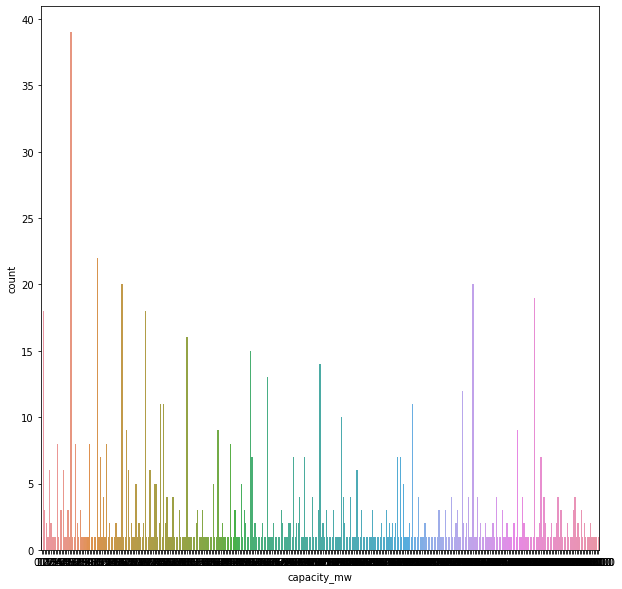

In [58]:
print(df['capacity_mw'].value_counts())   #visualizing the capacity_mw
plt.figure(figsize=(10,10))
sns.countplot(df['capacity_mw'])
plt.show()

Here it can be seen the counts withrespect to capacity_mw.



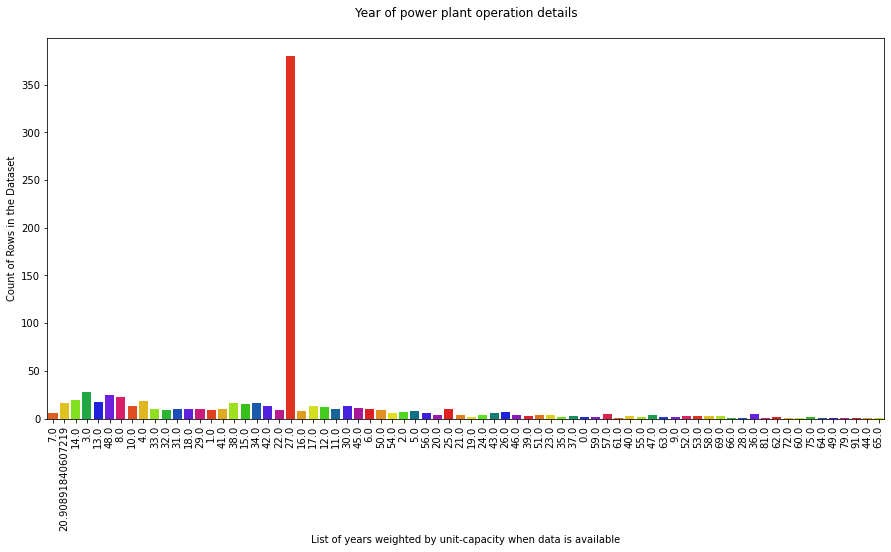

In [59]:
plt.figure(figsize=(15,7))
values = list(df['Power_plant_age'].unique())
diag = sns.countplot(df["Power_plant_age"], palette="prism")
diag.set_xticklabels(labels=values, rotation=90)
plt.title("Year of power plant operation details\n")
plt.xlabel("List of years weighted by unit-capacity when data is available")
plt.ylabel("Count of Rows in the Dataset")
plt.show()

In the above count plot we can see the list of years as to when the power plant data was made available. Since we had missing values in the "commissioning_year" column we replaced it with the median wherein the year "15" covered the most rows in our dataset compared to all the other years.

# Checking the Distribution of the Dataset, if it is normal


Numerical Column

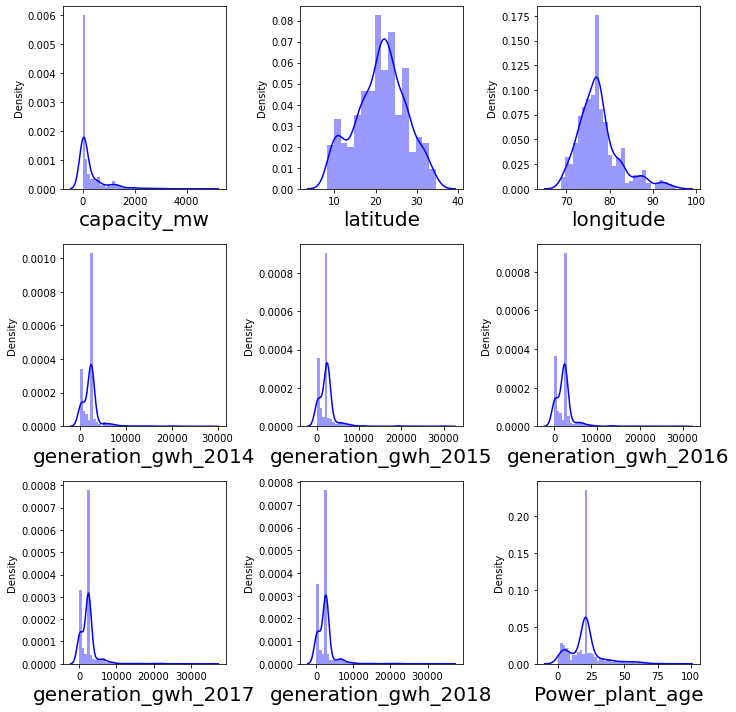

In [60]:
# Checking how the data has been distriubted in each column

plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column],color="b")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

Here in the plots we can see that the data is not normally distributed. Outliers and skewness is present, which needs to be treated.



# Bivariate Analysis


# Correlation between features and target 'Capacity_mw'


<AxesSubplot:title={'center':'Comparision between geolocation_source and capacity_mw'}, xlabel='geolocation_source', ylabel='capacity_mw'>

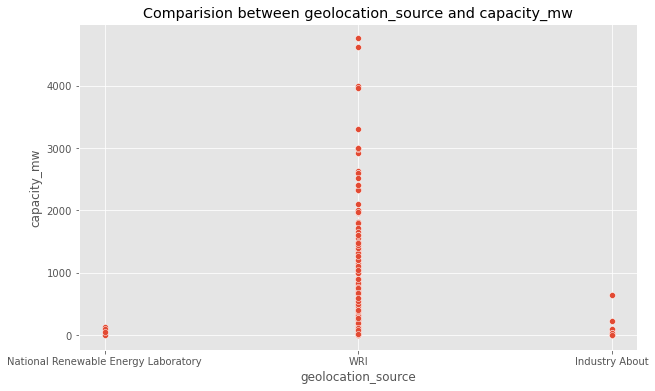

In [61]:
#Checking the relation between target capacity_mw and variable geolocation source
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between geolocation_source and capacity_mw')
sns.scatterplot(df['geolocation_source'],df["capacity_mw"])

Here also we can see that WRI 'geolocation_source' plays a major role



<AxesSubplot:title={'center':'Comparision between Power_plant_age and capacity_mw'}, xlabel='Power_plant_age', ylabel='capacity_mw'>

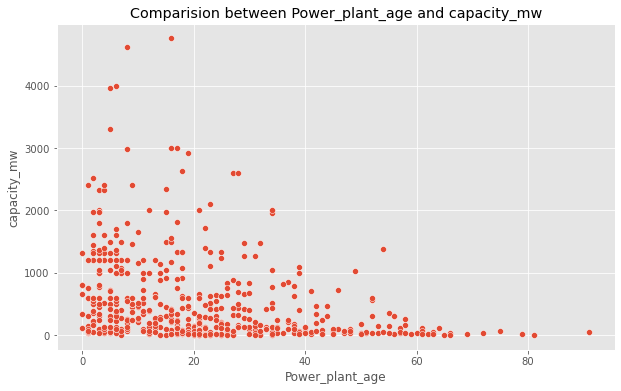

In [62]:
#Checking the relation between power plant age and capacity_mw
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between Power_plant_age and capacity_mw')
sns.scatterplot(df['Power_plant_age'],df["capacity_mw"])

Here we can see a negative correlation



<AxesSubplot:title={'center':'Comparision between latitude and capacity_mw'}, xlabel='latitude', ylabel='capacity_mw'>

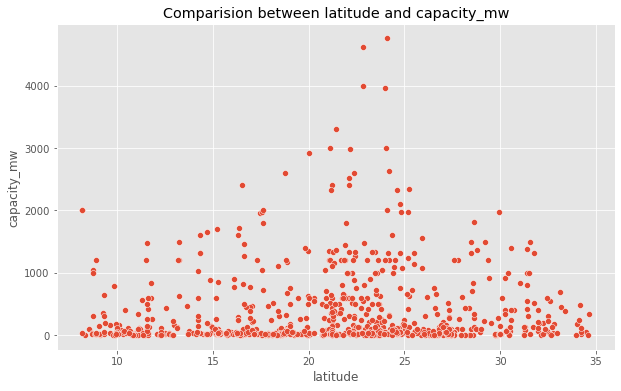

In [63]:
# Checking the relation between feature latitude and targer capacity_mw
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between latitude and capacity_mw')
sns.scatterplot(df['latitude'],df["capacity_mw"])

Here this feature does not show any linear relationship



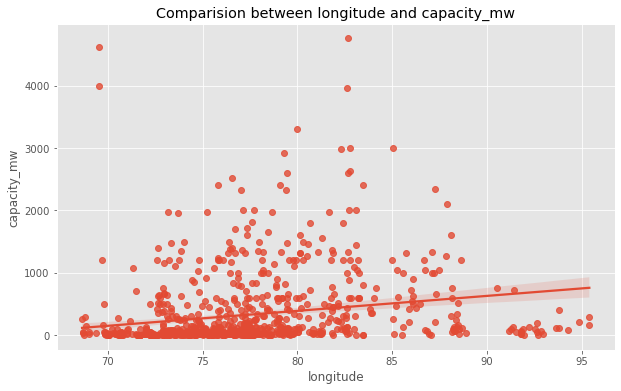

In [64]:
# Checking the relationship between target longitude and capacity_mw
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and capacity_mw')
sns.regplot(df['longitude'],df["capacity_mw"]);

This feature also does not show any linear relationship



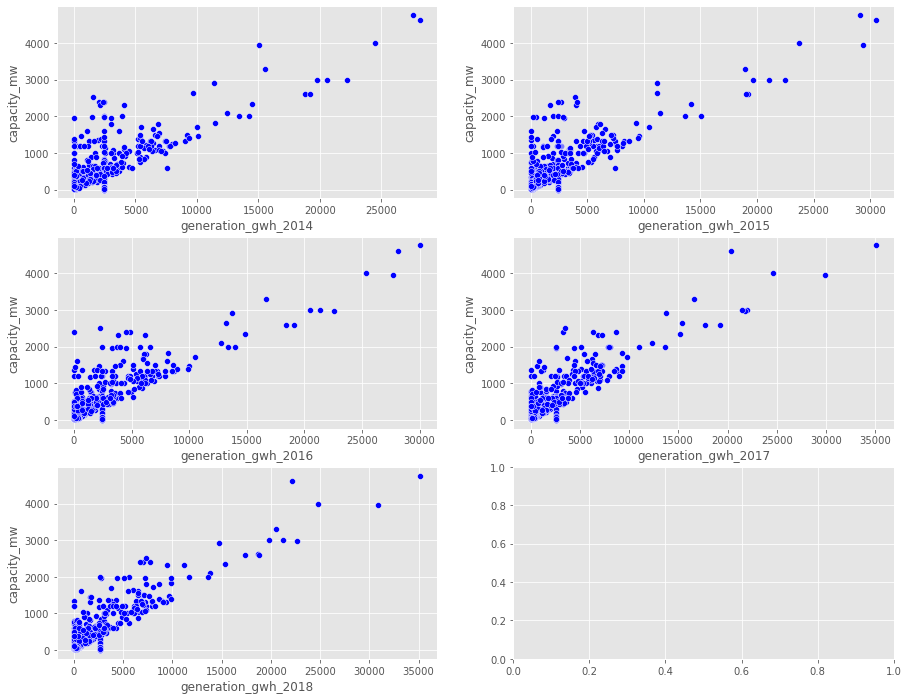

In [65]:
fig,axes=plt.subplots(3,2,figsize=(15,12))

#Checking the relation between feature generation_gwh_2013 and targer capacity_mw
sns.scatterplot(x = "generation_gwh_2014", y = "capacity_mw",ax=axes[0,0],data = df,color="b")

#Checking the relation between feature generation_gwh_2014 and targer capacity_mw
sns.scatterplot(x='generation_gwh_2015',y='capacity_mw',ax=axes[0,1],data=df,color="b")

#Checking the relation between feature generation_gwh_2015 and targer capacity_mw
sns.scatterplot(x='generation_gwh_2016',y='capacity_mw',ax=axes[1,0],data=df,color="b")

#Checking the relation between feature generation_gwh_2016 and targer capacity_mw
sns.scatterplot(x='generation_gwh_2017',y='capacity_mw',ax=axes[1,1],data=df,color="b")

#Checking the relation between feature generation_gwh_2017 and targer capacity_mw
sns.scatterplot(x='generation_gwh_2018',y='capacity_mw',ax=axes[2,0],data=df,color="b")
plt.show()

This features shows a positive correlation. Here the electricity generation reported for the years has capacity above 1000 mw also as the generation growth increases, the capacity of plant is also increasing moderately.

# Correlation between features and target 'Fuel_Types'


<AxesSubplot:title={'center':'Comparision between Power_plant_age and Fuel_Type'}, xlabel='Power_plant_age', ylabel='Fuel_Type'>

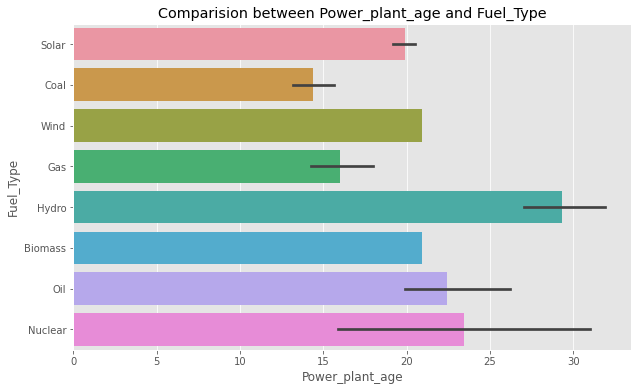

In [66]:
#Checking the relation between target fuel_type and variable Power_plant_age
plt.figure(figsize=[10,6])
plt.title('Comparision between Power_plant_age and Fuel_Type')
sns.barplot(df['Power_plant_age'],df["Fuel_Type"])

Here we can see that older power plants uses Hydro as energy source, followed by oil. The newer power plants are using more of Coal, Solar and Gas



<AxesSubplot:title={'center':'Comparision between latitude and Fuel_Type'}, xlabel='latitude', ylabel='Fuel_Type'>

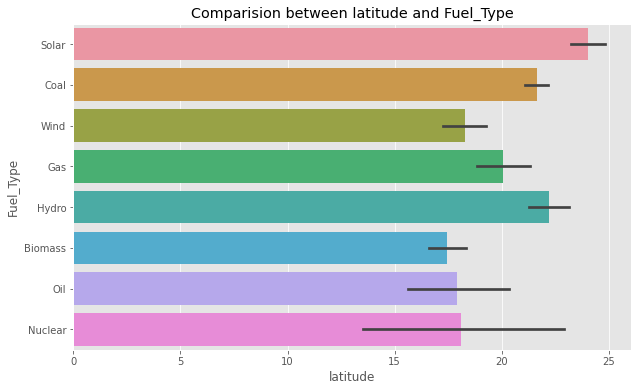

In [67]:
# Checking the relation between feature latitude and targer Fuel_Type
plt.figure(figsize=[10,6])
plt.title('Comparision between latitude and Fuel_Type')
sns.barplot(df['latitude'],df["Fuel_Type"])

Solar has the highest latitude



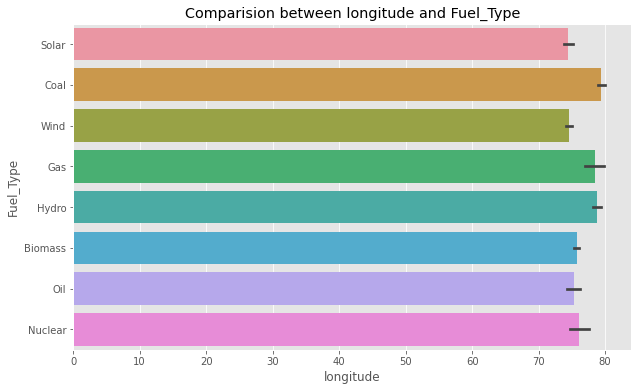

In [68]:
# Checking the relationship between target longitude and Fuel_Type
plt.figure(figsize=[10,6])
plt.title('Comparision between longitude and Fuel_Type')
sns.barplot(df['longitude'],df["Fuel_Type"]);

Here Gas shows the highest longitude



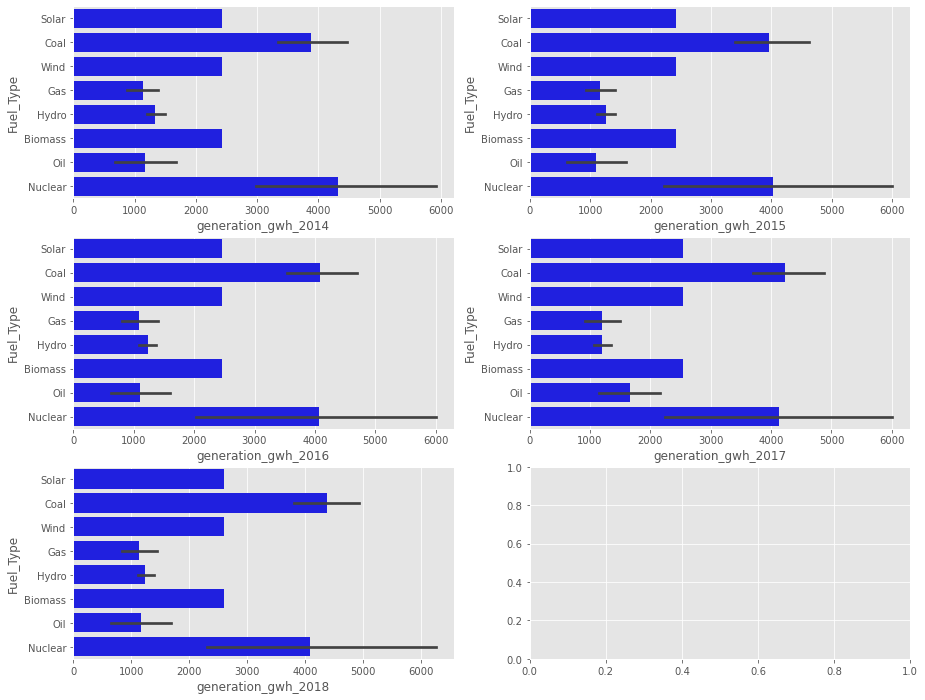

In [69]:
fig,axes=plt.subplots(3,2,figsize=(15,12))

#Checking the relation between feature generation_gwh_2013 and targer Fuel_Type
sns.barplot(x = "generation_gwh_2014", y = "Fuel_Type",ax=axes[0,0],data = df,color="b")

#Checking the relation between feature generation_gwh_2014 and targer Fuel_Type
sns.barplot(x='generation_gwh_2015',y='Fuel_Type',ax=axes[0,1],data=df,color="b")

#Checking the relation between feature generation_gwh_2015 and targer Fuel_Type
sns.barplot(x='generation_gwh_2016',y='Fuel_Type',ax=axes[1,0],data=df,color="b")

#Checking the relation between feature generation_gwh_2016 and targer Fuel_Type
sns.barplot(x='generation_gwh_2017',y='Fuel_Type',ax=axes[1,1],data=df,color="b")

#Checking the relation between feature generation_gwh_2017 and targer Fuel_Type
sns.barplot(x='generation_gwh_2018',y='Fuel_Type',ax=axes[2,0],data=df,color="b")
plt.show()

Here we can see that the most used energy source in all the years is nuclear followed by coal



# Checking the relationship between both the targets


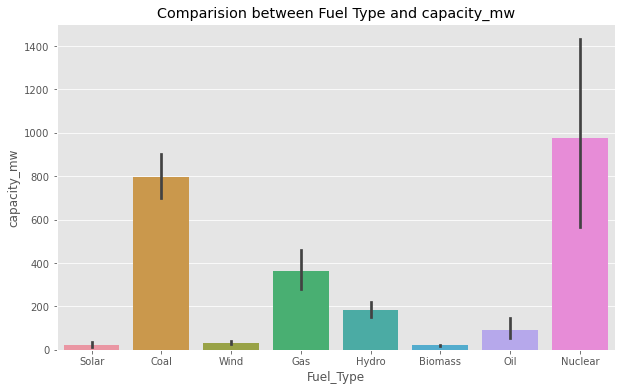

In [70]:
plt.figure(figsize = (10,6))
plt.title("Comparision between Fuel Type and capacity_mw")
sns.barplot(x = "Fuel_Type", y = "capacity_mw", data = df)
plt.show()

Here also it shows that energy source Nuclear has the major contribution



# Label Encoding


In [71]:
categorical_col = ['Fuel_Type', 'other_fuel1', 'source', 'geolocation_source']

In [72]:
LE=LabelEncoder()
df[categorical_col]= df[categorical_col].apply(LE.fit_transform)

In [73]:
df[categorical_col]

,Fuel_Type,other_fuel1,source,geolocation_source
0,6,2,109,1
1,1,2,174,2
2,7,2,21,2
3,2,2,22,2
4,1,2,22,2
...,...,...,...,...
902,1,2,22,2
903,6,2,77,0
904,7,2,21,2
905,1,2,59,2


Now we have encoded the categorical columns



In [74]:
df

,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,6,2,109,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,7.000000
1,98.0,24.7663,74.6090,1,2,174,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,20.908918
2,39.2,21.9038,69.3732,7,2,21,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,20.908918
3,135.0,23.8712,91.3602,2,2,22,2,617.789264,843.747000,886.004428,663.774500,626.239128,14.000000
4,1800.0,21.9603,82.4091,1,2,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2,22,2,2431.823590,0.994875,233.596650,865.400000,686.500000,2.000000
903,3.0,12.8932,78.1654,6,2,77,0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,20.908918
904,25.5,15.2758,75.5811,7,2,21,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,20.908918
905,80.0,24.3500,73.7477,1,2,59,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,20.908918


# Identifying the outliers


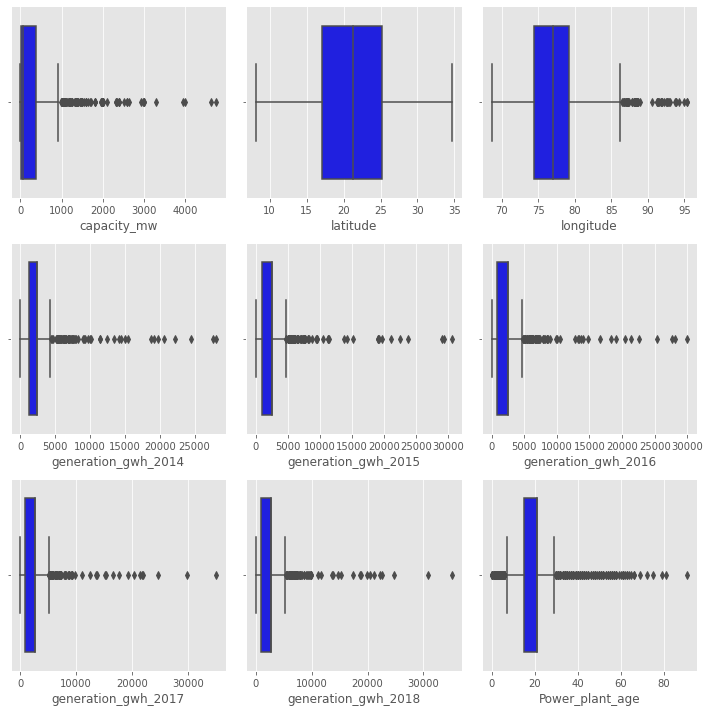

In [75]:
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column],color="blue")
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

In the boxplot we can notice the outliers present in all the columns except latitude. Even target column has outliers but no need to remove it. Let's remove outliers using Zscore method.

In [76]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'Fuel_Type', 'other_fuel1',
       'source', 'geolocation_source', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018', 'Power_plant_age'],
      dtype='object')

In [77]:
# Features containing outliers
features = df[['longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018','Power_plant_age']]


In [78]:
z=np.abs(zscore(features))

z

,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,0.878280,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16,1.069162e+00
1,0.593788,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16,3.823299e-15
2,1.682394,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16,3.823299e-15
3,2.889052,6.809773e-01,0.554446,0.549988,6.452243e-01,6.518573e-01,5.310801e-01
4,1.027976,2.266352e-01,1.220581,1.312471,9.718925e-01,1.544399e+00,1.376637e+00
...,...,...,...,...,...,...,...
902,0.022477,1.707094e-16,0.849344,0.776810,5.761719e-01,6.319636e-01,1.453505e+00
903,0.145644,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16,3.823299e-15
904,0.391673,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16,3.823299e-15
905,0.772866,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16,3.823299e-15


In [79]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)] 
new_df

,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,6,2,109,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,7.000000
1,98.0,24.7663,74.6090,1,2,174,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,20.908918
2,39.2,21.9038,69.3732,7,2,21,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,20.908918
3,135.0,23.8712,91.3602,2,2,22,2,617.789264,843.747000,886.004428,663.774500,626.239128,14.000000
4,1800.0,21.9603,82.4091,1,2,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2,22,2,2431.823590,0.994875,233.596650,865.400000,686.500000,2.000000
903,3.0,12.8932,78.1654,6,2,77,0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,20.908918
904,25.5,15.2758,75.5811,7,2,21,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,20.908918
905,80.0,24.3500,73.7477,1,2,59,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,20.908918


In [80]:
df.shape

(907, 13)

In [81]:
new_df.shape

(855, 13)

In [82]:
print("total_dropped_rows",df.shape[0] - new_df.shape[0])

total_dropped_rows 52


# Percentage data loss:


In [83]:
loss_percent=(907-851)/907*100
print(loss_percent,'%')

6.174200661521499 %


checking the data loss percentage by comparing the rows in our original data set and the new data set after removal of the outliers. usually less than 10% data loss is acceptable

 df_new is the new data set after all the unnecessary columns and all the outliers apart from target columns (with z<3 z score) are removed


# Correlation between the target variable and features


In [84]:
cor = new_df.corr()
cor

,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
capacity_mw,1.000000,0.040227,0.252753,-0.400270,-0.001089,-0.275267,0.233926,0.388669,0.410946,0.485460,0.537296,0.566737,-0.321737
latitude,0.040227,1.000000,-0.016349,-0.000167,0.036869,0.069183,-0.202429,0.039691,0.023196,0.012820,0.010340,0.011831,-0.102060
longitude,0.252753,-0.016349,1.000000,-0.378521,0.029716,-0.238866,0.267418,-0.056484,-0.054657,-0.011711,-0.017582,-0.012099,-0.156196
Fuel_Type,-0.400270,-0.000167,-0.378521,1.000000,0.006253,0.040273,-0.479060,-0.041235,-0.041384,-0.053066,-0.057818,-0.065723,0.155342
other_fuel1,-0.001089,0.036869,0.029716,0.006253,1.000000,0.028321,-0.022711,0.035874,0.041551,0.049061,0.029260,0.054886,-0.048792
source,-0.275267,0.069183,-0.238866,0.040273,0.028321,1.000000,-0.498367,0.084852,0.090636,0.086575,0.081335,0.079675,0.015329
geolocation_source,0.233926,-0.202429,0.267418,-0.479060,-0.022711,-0.498367,1.000000,-0.068046,-0.072684,-0.069428,-0.065226,-0.063894,-0.023677
generation_gwh_2014,0.388669,0.039691,-0.056484,-0.041235,0.035874,0.084852,-0.068046,1.000000,0.887586,0.788083,0.725694,0.716948,-0.124242
generation_gwh_2015,0.410946,0.023196,-0.054657,-0.041384,0.041551,0.090636,-0.072684,0.887586,1.000000,0.898684,0.798288,0.787964,-0.156706
generation_gwh_2016,0.485460,0.012820,-0.011711,-0.053066,0.049061,0.086575,-0.069428,0.788083,0.898684,1.000000,0.906530,0.886570,-0.204374


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5]),
 [Text(0, 0.5, 'capacity_mw'),
  Text(0, 1.5, 'latitude'),
  Text(0, 2.5, 'longitude'),
  Text(0, 3.5, 'Fuel_Type'),
  Text(0, 4.5, 'other_fuel1'),
  Text(0, 5.5, 'source'),
  Text(0, 6.5, 'geolocation_source'),
  Text(0, 7.5, 'generation_gwh_2014'),
  Text(0, 8.5, 'generation_gwh_2015'),
  Text(0, 9.5, 'generation_gwh_2016'),
  Text(0, 10.5, 'generation_gwh_2017'),
  Text(0, 11.5, 'generation_gwh_2018'),
  Text(0, 12.5, 'Power_plant_age')])

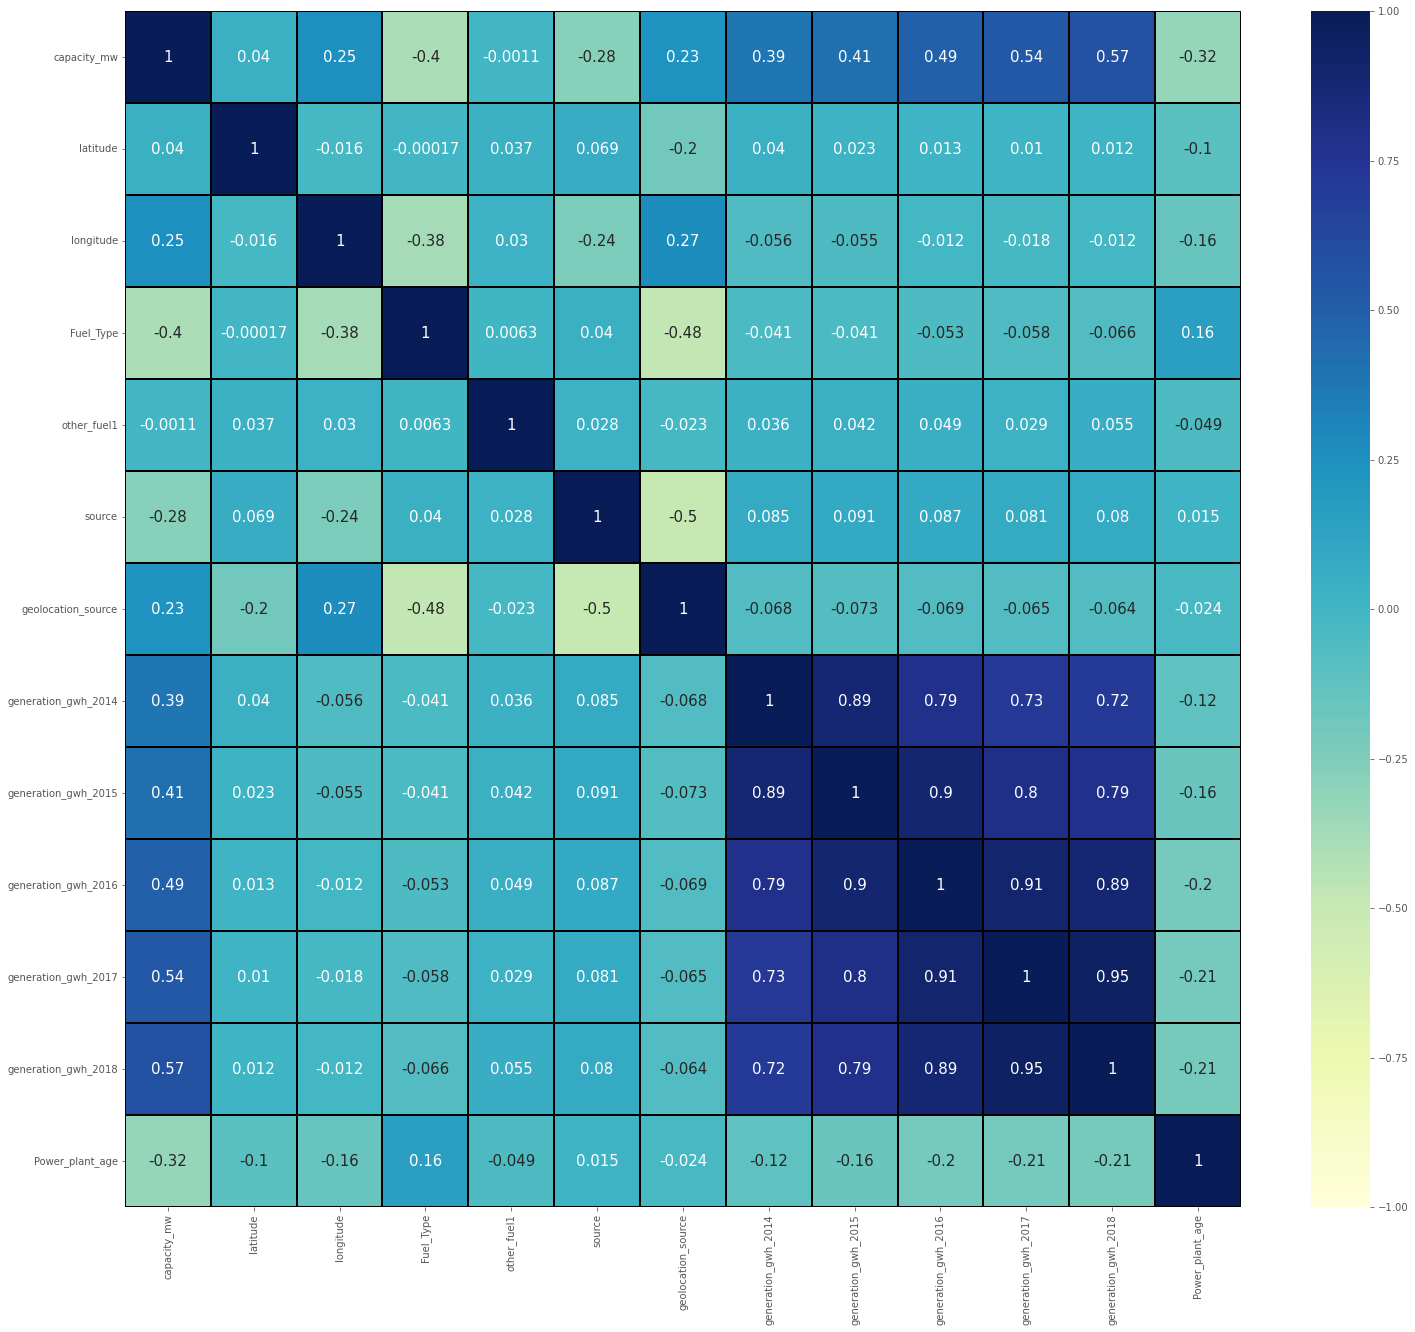

In [85]:
plt.figure(figsize=(25,22))
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor="black",annot_kws={'size':15},cmap="YlGnBu")
plt.yticks(rotation=0)

In [86]:
new_df.corr()['Fuel_Type'].sort_values()

geolocation_source    -0.479060
capacity_mw           -0.400270
longitude             -0.378521
generation_gwh_2018   -0.065723
generation_gwh_2017   -0.057818
generation_gwh_2016   -0.053066
generation_gwh_2015   -0.041384
generation_gwh_2014   -0.041235
latitude              -0.000167
other_fuel1            0.006253
source                 0.040273
Power_plant_age        0.155342
Fuel_Type              1.000000
Name: Fuel_Type, dtype: float64

In [87]:
new_df.corr()['capacity_mw'].sort_values()

Fuel_Type             -0.400270
Power_plant_age       -0.321737
source                -0.275267
other_fuel1           -0.001089
latitude               0.040227
geolocation_source     0.233926
longitude              0.252753
generation_gwh_2014    0.388669
generation_gwh_2015    0.410946
generation_gwh_2016    0.485460
generation_gwh_2017    0.537296
generation_gwh_2018    0.566737
capacity_mw            1.000000
Name: capacity_mw, dtype: float64

Here we can see the co-relation between all the features and the features and targets

The label capacity_mw is highly positively correlated with the features generation_gwh_2017, generation_gwh_2016, generation_gwh_2015, generation_gwh_2014, generation_gwh_2013. And the label is negatively correlated with the features Fuel_Type, source and Power_plant_age. The columns other_fuel1 and latitude have no relation with the label, so we can drop them.

The label Fuel_Type is less correlated with Power_plant_age and source. The label is negatively correlated with geolocation_source, longitude, capacity_mw, and all generation_gwh years.

From the heat map we can notice most of the features are highly correlated with each other which leads to multicollinearity problem. So will try to solve this problem by Checking VIF value before building our models.

Also the features other_fuel1 and latitude have very very less correlation with both the labels. Hence after checking VIF we can think about dropping these 2 columns.



# Visualizing the correlation between label and features using bar plot:


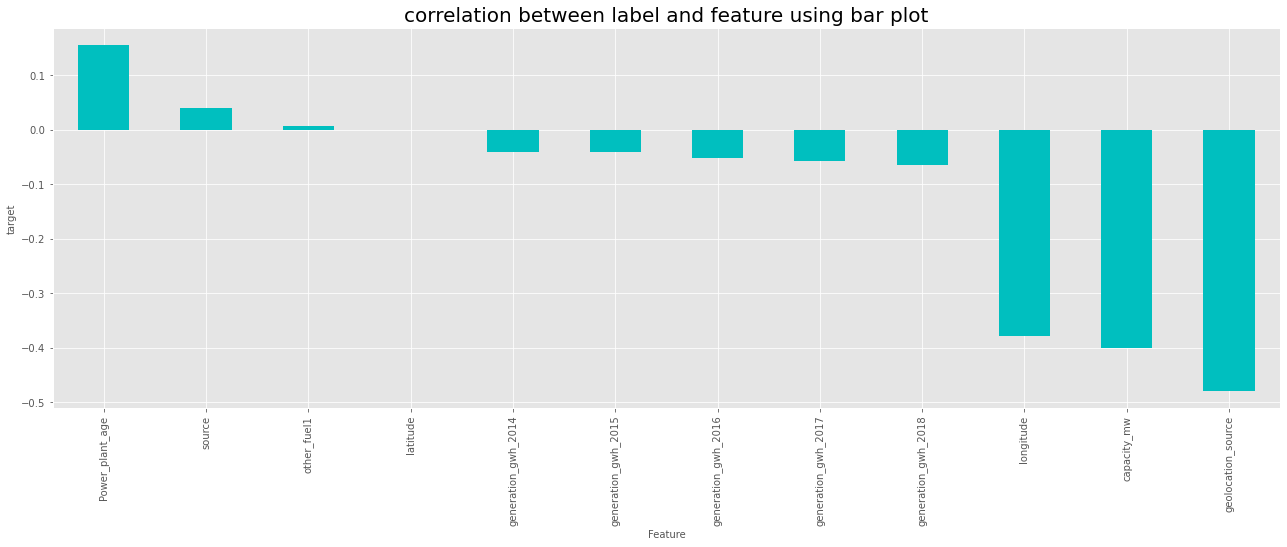

In [88]:
plt.figure(figsize=(22,7))
new_df.corr()['Fuel_Type'].sort_values(ascending=False).drop(['Fuel_Type']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

# MultiCollinearity with Variance Inflation Factor:


In [89]:
df1=pd.DataFrame(data=new_df)       # copying the dataframe
df1

,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,6,2,109,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,7.000000
1,98.0,24.7663,74.6090,1,2,174,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,20.908918
2,39.2,21.9038,69.3732,7,2,21,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,20.908918
3,135.0,23.8712,91.3602,2,2,22,2,617.789264,843.747000,886.004428,663.774500,626.239128,14.000000
4,1800.0,21.9603,82.4091,1,2,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2,22,2,2431.823590,0.994875,233.596650,865.400000,686.500000,2.000000
903,3.0,12.8932,78.1654,6,2,77,0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,20.908918
904,25.5,15.2758,75.5811,7,2,21,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,20.908918
905,80.0,24.3500,73.7477,1,2,59,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,20.908918


In [90]:
x1=df1.iloc[:,1:]
y1=df1.iloc[:,0]

In [91]:
x1

,latitude,longitude,Fuel_Type,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,28.1839,73.2407,6,2,109,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,7.000000
1,24.7663,74.6090,1,2,174,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,20.908918
2,21.9038,69.3732,7,2,21,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,20.908918
3,23.8712,91.3602,2,2,22,2,617.789264,843.747000,886.004428,663.774500,626.239128,14.000000
4,21.9603,82.4091,1,2,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
902,16.2949,77.3568,1,2,22,2,2431.823590,0.994875,233.596650,865.400000,686.500000,2.000000
903,12.8932,78.1654,6,2,77,0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,20.908918
904,15.2758,75.5811,7,2,21,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,20.908918
905,24.3500,73.7477,1,2,59,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,20.908918


In [92]:
y1

0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
902    1600.0
903       3.0
904      25.5
905      80.0
906      16.5
Name: capacity_mw, Length: 855, dtype: float64

In [93]:
x1.shape

(855, 12)

In [94]:
y1.shape

(855,)

In [95]:
x1.shape[1]    # 12 number of columns

12

In [96]:
# importing required libraries
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [97]:
def calc_vif(x1):
    vif=pd.DataFrame()
    vif["variables"]=x1.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
    return(vif)

In [98]:
calc_vif(x1)

,variables,VIF FACTOR
0,latitude,13.729171
1,longitude,244.556662
2,Fuel_Type,4.368870
3,other_fuel1,286.804549
4,source,2.833256
5,geolocation_source,13.608184
6,generation_gwh_2014,15.266551
7,generation_gwh_2015,28.557941
8,generation_gwh_2016,31.977269
9,generation_gwh_2017,38.738188


other_fuel1 has the highest VIF FACTOR hence lets drop it first

In [99]:
x1=df1.drop(['other_fuel1'],axis=1)

In [100]:
calc_vif(x1)

,variables,VIF FACTOR
0,capacity_mw,3.268729
1,latitude,13.284496
2,longitude,47.600409
3,Fuel_Type,4.546239
4,source,3.095209
5,geolocation_source,13.071694
6,generation_gwh_2014,15.300660
7,generation_gwh_2015,28.598846
8,generation_gwh_2016,31.966625
9,generation_gwh_2017,38.698505


Since latitude has the lowest contribution compared to both the targets lets drop that first and see what happens



In [101]:
x1=df1.drop(['other_fuel1','latitude'],axis=1)

In [102]:
calc_vif(x1)

,variables,VIF FACTOR
0,capacity_mw,3.261932
1,longitude,31.246762
2,Fuel_Type,4.544852
3,source,3.091939
4,geolocation_source,12.701282
5,generation_gwh_2014,15.268215
6,generation_gwh_2015,28.596850
7,generation_gwh_2016,31.942736
8,generation_gwh_2017,38.698493
9,generation_gwh_2018,32.703431


We can see VIF has decreased drastically cause of removing of these 2 columns. Hence lets drop these 2 columns next



# Feature selection by dropping columns


In [103]:
new_df.drop("other_fuel1",axis=1,inplace=True)
new_df.drop("latitude",axis=1,inplace=True)

In [104]:
new_df.head()

,capacity_mw,longitude,Fuel_Type,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,73.2407,6,109,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,7.000000
1,98.0,74.6090,1,174,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,20.908918
2,39.2,69.3732,7,21,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,20.908918
3,135.0,91.3602,2,22,2,617.789264,843.747000,886.004428,663.774500,626.239128,14.000000
4,1800.0,82.4091,1,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,3.000000


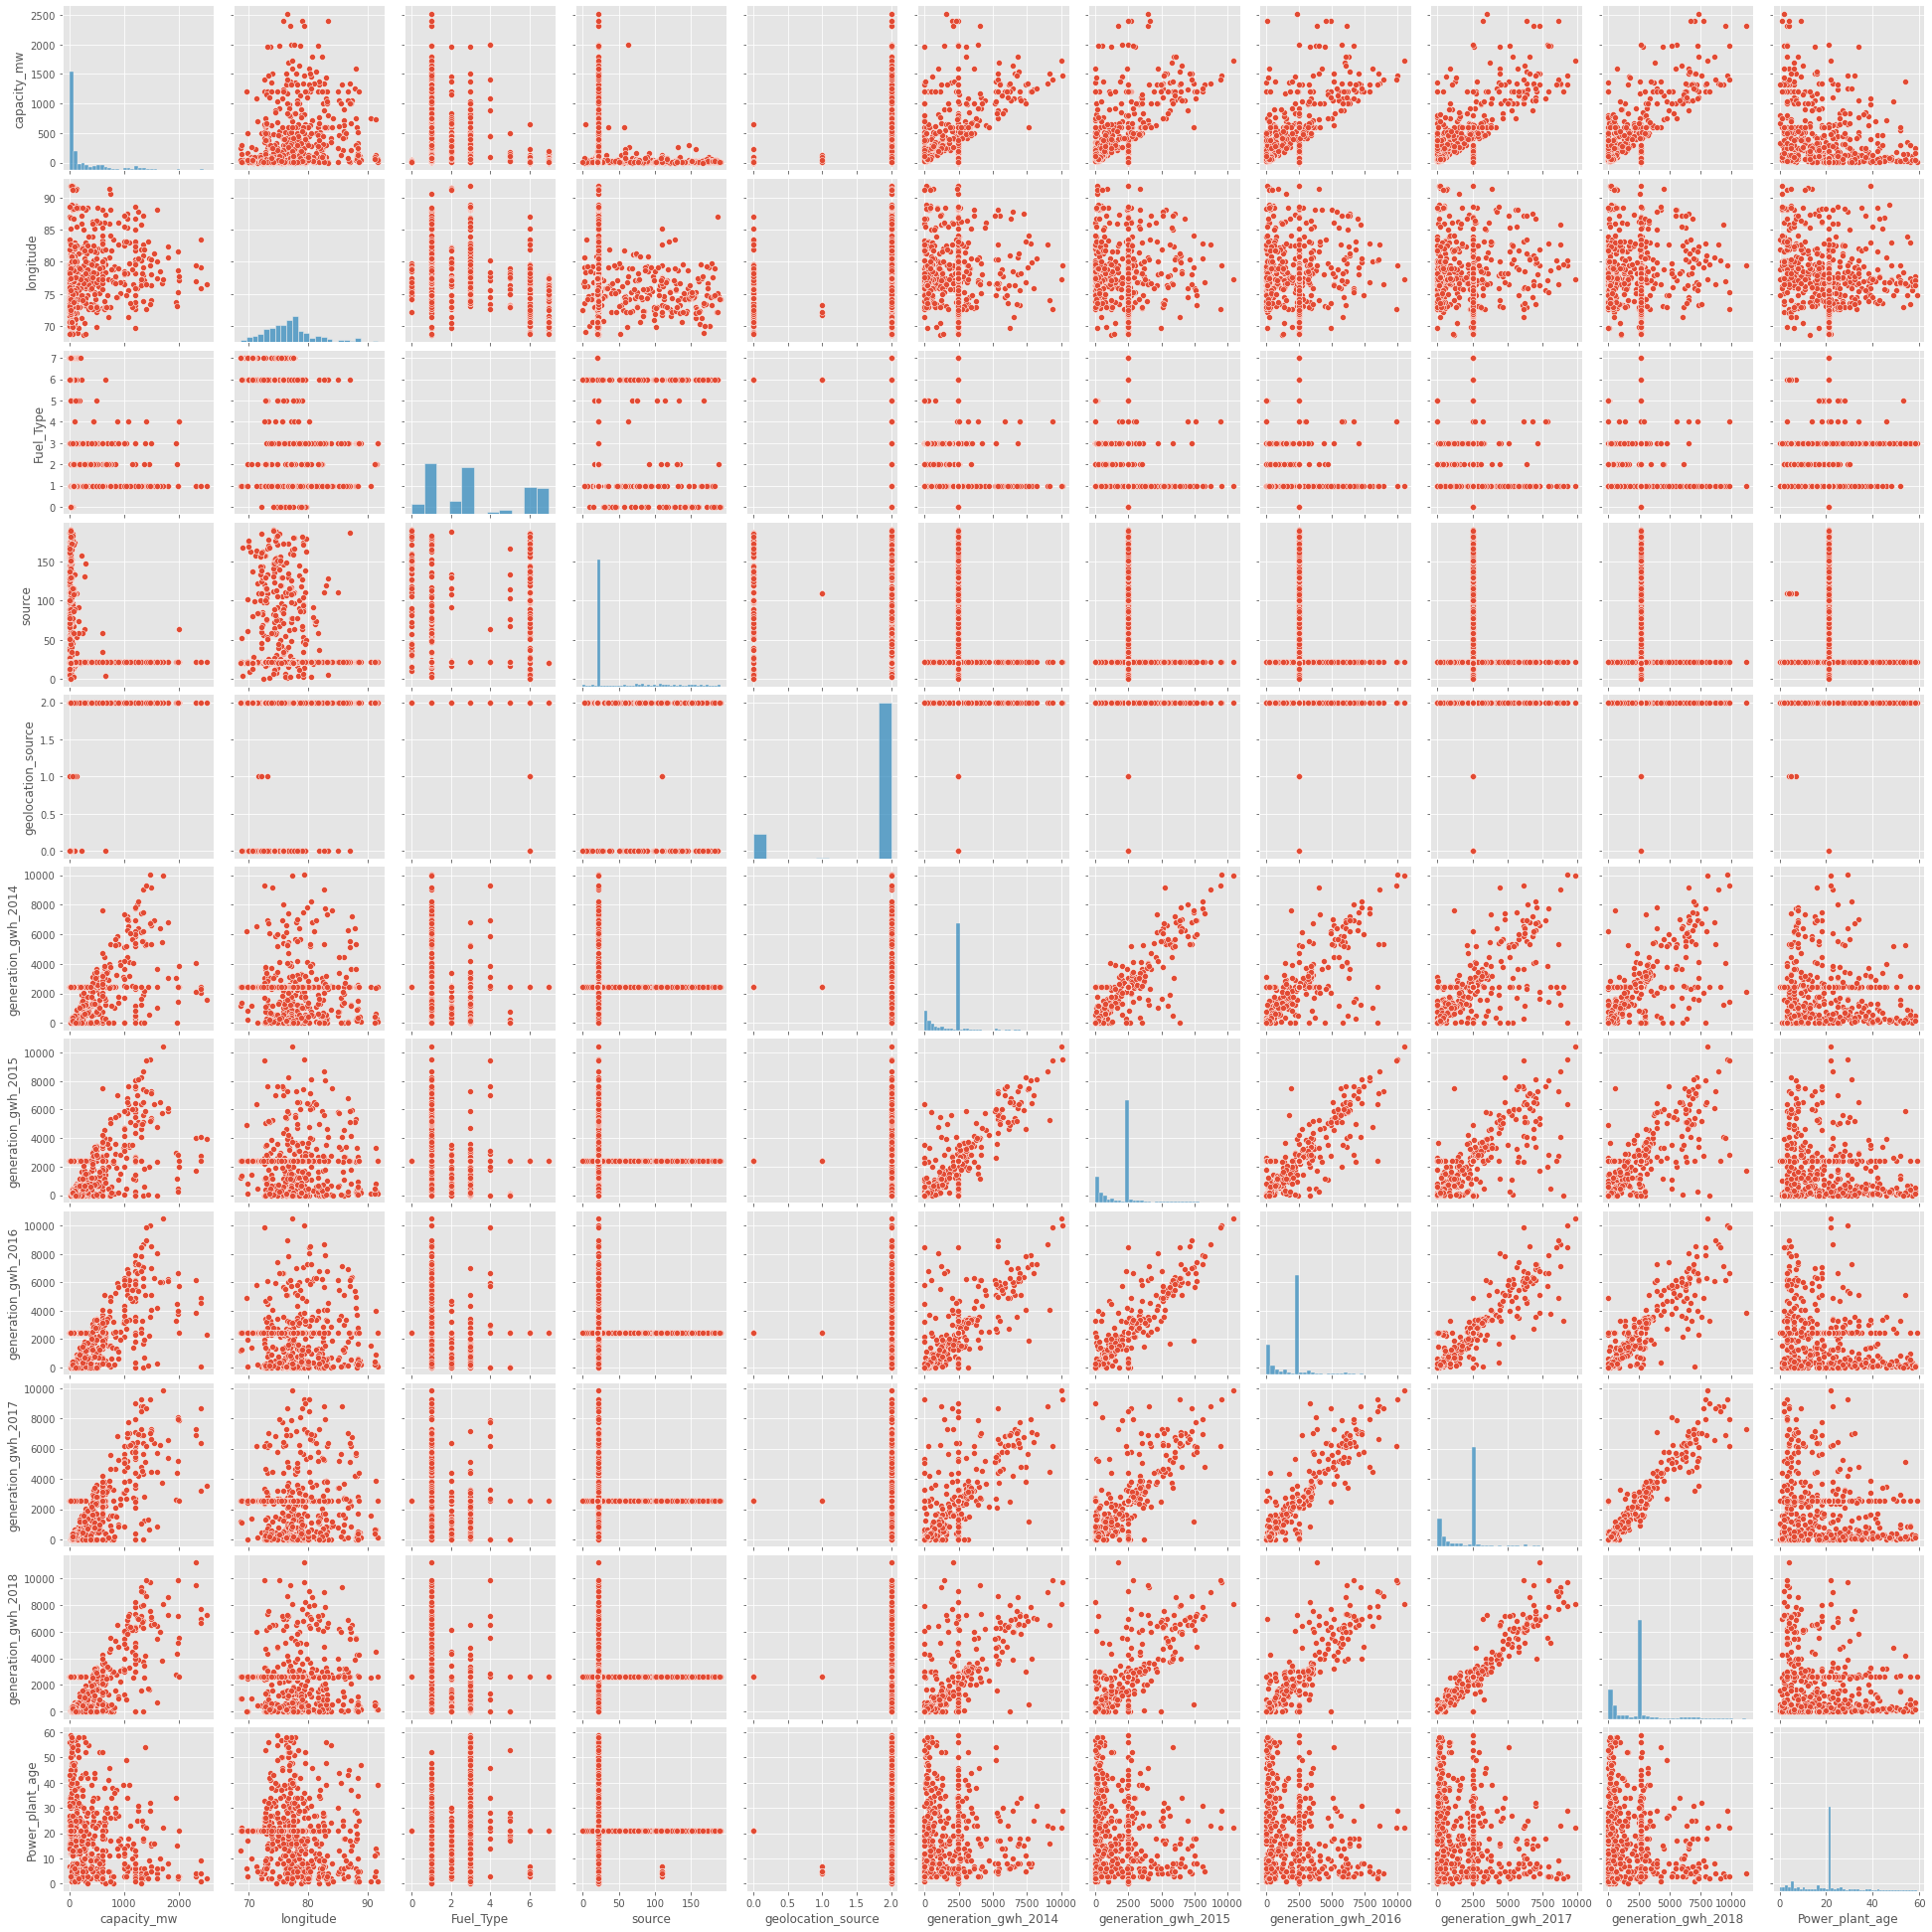

In [105]:
sns.pairplot(new_df)

We can see the relation between all the features and target variable using pairplot.



# Machine Learning


# 1.Predicting "Capacity_mw" Target


# Splitting the dataset into Features and Target


In [106]:
x=new_df.drop('capacity_mw', axis=1)
y=new_df["capacity_mw"]

In [107]:
x.shape

(855, 10)

In [108]:
y.shape

(855,)

In [109]:
x

,longitude,Fuel_Type,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,73.2407,6,109,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,7.000000
1,74.6090,1,174,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,20.908918
2,69.3732,7,21,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,20.908918
3,91.3602,2,22,2,617.789264,843.747000,886.004428,663.774500,626.239128,14.000000
4,82.4091,1,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,3.000000
...,...,...,...,...,...,...,...,...,...,...
902,77.3568,1,22,2,2431.823590,0.994875,233.596650,865.400000,686.500000,2.000000
903,78.1654,6,77,0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,20.908918
904,75.5811,7,21,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,20.908918
905,73.7477,1,59,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,20.908918


In [110]:
y

0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
902    1600.0
903       3.0
904      25.5
905      80.0
906      16.5
Name: capacity_mw, Length: 855, dtype: float64

# Checking for skewness


In [111]:
x.skew().sort_values()

geolocation_source    -2.074380
Fuel_Type              0.420074
Power_plant_age        0.836962
longitude              0.917381
generation_gwh_2017    1.293269
generation_gwh_2015    1.375828
generation_gwh_2016    1.389992
generation_gwh_2018    1.421012
generation_gwh_2014    1.525975
source                 1.741703
dtype: float64

The following columns have skewness more than +0.5 and -0.5.

longitude generation_gwh_2013 generation_gwh_2014 generation_gwh_2015 generation_gwh_2016 generation_gwh_2017 Power_plant_age

# Removing skewness using yeo-johnson method


In [112]:
from sklearn.preprocessing import PowerTransformer
skew = ['longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Power_plant_age']
transf = PowerTransformer(method='yeo-johnson')

In [113]:
x[skew] = transf.fit_transform(x[skew].values)
x[skew].head()

,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-0.932921,0.325398,0.350764,0.353547,0.346830,0.356994,-1.213550
1,-0.513810,0.325398,0.350764,0.353547,0.346830,0.356994,0.184035
2,-2.368066,0.325398,0.350764,0.353547,0.346830,0.356994,0.184035
3,2.447853,-1.051490,-0.738620,-0.686010,-0.906651,-0.919602,-0.448307
4,1.253377,0.665459,1.898972,1.923558,1.534388,2.046635,-1.768974


In [114]:
x.skew()

longitude             -0.000494
Fuel_Type              0.420074
source                 1.741703
geolocation_source    -2.074380
generation_gwh_2014   -0.241358
generation_gwh_2015   -0.309409
generation_gwh_2016   -0.311647
generation_gwh_2017   -0.330764
generation_gwh_2018   -0.328334
Power_plant_age        0.003358
dtype: float64

Since Fuel_Type, source and geolocation_source were categorically encoded values we didnt use transformation for skewness removal.

Rest of the numerical data columns the skewness has been removed.


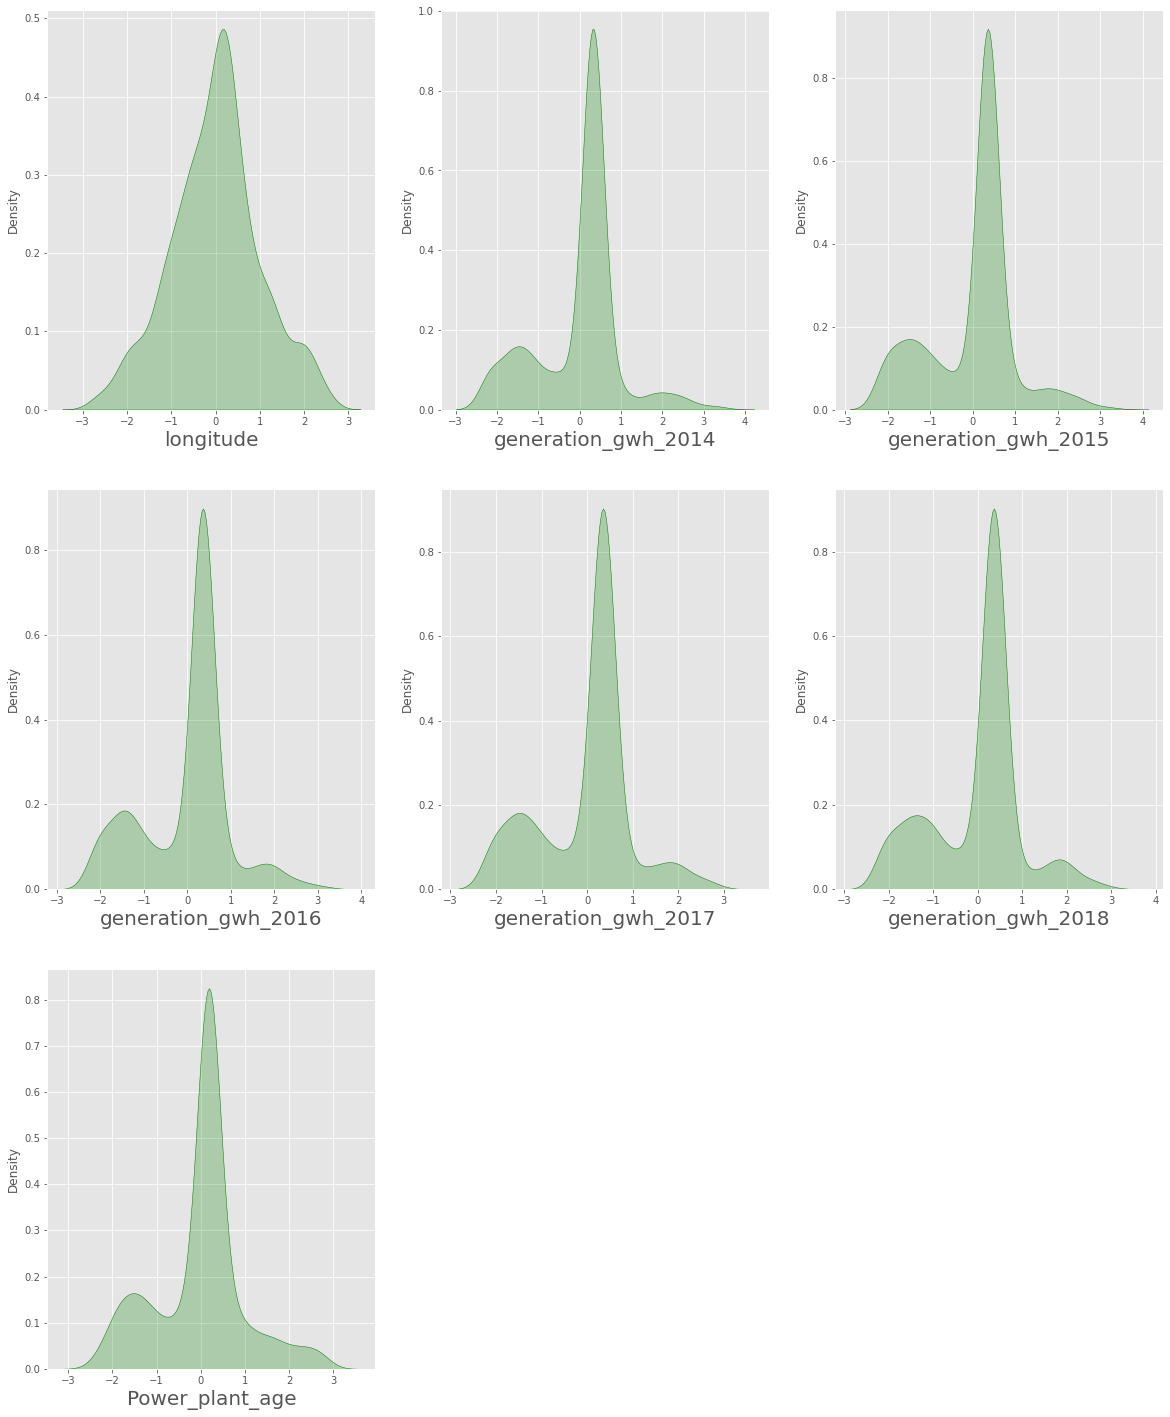

In [115]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x[column],color='g',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

The dataset looks normal now



# Feature Scalling


In [116]:
#Scalling the data using Standard Scaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,longitude,Fuel_Type,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-0.932921,1.179853,1.402768,-1.040462,0.325398,0.350764,0.353547,0.346830,0.356994,-1.213550
1,-0.513810,-0.972887,2.829096,0.406034,0.325398,0.350764,0.353547,0.346830,0.356994,0.184035
2,-2.368065,1.610401,-0.528261,0.406034,0.325398,0.350764,0.353547,0.346830,0.356994,0.184035
3,2.447853,-0.542339,-0.506318,0.406034,-1.051490,-0.738620,-0.686010,-0.906651,-0.919602,-0.448307
4,1.253377,-0.972887,-0.506318,0.406034,0.665459,1.898972,1.923558,1.534388,2.046635,-1.768974
...,...,...,...,...,...,...,...,...,...,...
850,0.216288,-0.972887,-0.506318,0.406034,0.325398,-2.098927,-1.419729,-0.723788,-0.861856,-1.936692
851,0.406355,1.179853,0.700575,-2.486957,0.325398,0.350764,0.353547,0.346830,0.356994,0.184035
852,-0.239580,1.610401,-0.528261,0.406034,0.325398,0.350764,0.353547,0.346830,0.356994,0.184035
853,-0.772877,-0.972887,0.305592,0.406034,0.325398,0.350764,0.353547,0.346830,0.356994,0.184035


The dataset x has now been scaled.



# MultiCollinearity with Variance Inflation Factor


In [117]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.313938,longitude
1,1.640998,Fuel_Type
2,1.524189,source
3,1.866593,geolocation_source
4,4.126120,generation_gwh_2014
5,7.729414,generation_gwh_2015
6,10.650705,generation_gwh_2016
7,11.551685,generation_gwh_2017
8,11.337913,generation_gwh_2018
9,1.097601,Power_plant_age


VIF values in all the columns are less then 10, hence no multicolinearity problem exists.



# Finding best random state


In [118]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [119]:
#getting the best random state for .20 test size
maxAccu=0
maxRS=0
for i in range(1,200): 
    x_train,x_test, y_train, y_test =train_test_split(x,y, test_size=.20,random_state=i)
    mod=RandomForestRegressor()
    mod.fit(x_train, y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('R2 Score=', maxAccu, 'Random_State',maxRS)

R2 Score= 0.900563653439781 Random_State 105


In [120]:
#getting the best random state for .30 test size
maxAccu=0
maxRS=0
for i in range(1,200): 
    x_train,x_test, y_train, y_test =train_test_split(x,y, test_size=.30,random_state=i)
    mod=RandomForestRegressor()
    mod.fit(x_train, y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('R2 Score=', maxAccu, 'Random_State',maxRS)

R2 Score= 0.8688635788847998 Random_State 110


We got best r2 score of 0.868 at a random state of 125 for test_size=.20



# Train_test_Split


In [121]:
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=.20, random_state=125)

In [122]:
# importing all the required libraries

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [123]:
# creating a function to run all the regressors

def regressor(model, x, y):
    x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=125)
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting y_test
    pred = model.predict(x_test)
    
    # Root Mean Square Error (RMSE)
    rmse = mean_squared_error(y_test, pred, squared=False)
    print("Root Mean Square Error is:", rmse)
    
    # R2 score
    r2 = r2_score(y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, x, y, cv=5).mean())*100
    print("Cross Validation Score is:", cv_score)
    
    # Result of r2 score - cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

# Linear Regression


In [124]:
model=LinearRegression()
regressor(model, x, y)

Root Mean Square Error is: 384.80598991299786
R2 Score is: 41.708786002512454
Cross Validation Score is: 45.46739374466561
R2 Score - Cross Validation Score is -3.7586077421531527


# L1 -- Lasso Regression


In [125]:
model=Lasso(alpha=0.001)
regressor(model, x, y)

Root Mean Square Error is: 384.8045793036266
R2 Score is: 41.70921336582888
Cross Validation Score is: 45.467673770947506
R2 Score - Cross Validation Score is -3.758460405118626


# L2 -- Ridge Regression


In [126]:
model=Ridge(alpha=0.001)
regressor(model, x, y)

Root Mean Square Error is: 384.80578725492256
R2 Score is: 41.70884740063219
Cross Validation Score is: 45.46744135709285
R2 Score - Cross Validation Score is -3.7585939564606647


# Elastic Net


In [127]:
model=ElasticNet(alpha=0.001)
regressor(model, x, y)

Root Mean Square Error is: 384.73658119523566
R2 Score is: 41.72981246072066
Cross Validation Score is: 45.48363846101726
R2 Score - Cross Validation Score is -3.7538260002965984


# Support Vector Regression


In [128]:
model=SVR(kernel='rbf')
regressor(model, x, y)

Root Mean Square Error is: 557.718547165239
R2 Score is: -22.447416833565526
Cross Validation Score is: -18.21812277215146
R2 Score - Cross Validation Score is -4.229294061414066


In [129]:
model=SVR(kernel='poly')
regressor(model, x, y)

Root Mean Square Error is: 523.7539042375641
R2 Score is: -7.987627454256585
Cross Validation Score is: -1.029921729571941
R2 Score - Cross Validation Score is -6.957705724684644


In [130]:
model=SVR(kernel='linear')
regressor(model, x, y)

Root Mean Square Error is: 483.0483656067338
R2 Score is: 8.145447246973037
Cross Validation Score is: 19.227563900899447
R2 Score - Cross Validation Score is -11.08211665392641


# Decision Tree Regressor


In [131]:
model=DecisionTreeRegressor(random_state=125)
regressor(model, x, y)

Root Mean Square Error is: 314.5531899458134
R2 Score is: 61.0499839929272
Cross Validation Score is: 62.41177794261248
R2 Score - Cross Validation Score is -1.3617939496852784


In [132]:
model=DecisionTreeRegressor()
regressor(model, x, y)

Root Mean Square Error is: 298.2090819592551
R2 Score is: 64.99249299482716
Cross Validation Score is: 63.71423189624539
R2 Score - Cross Validation Score is 1.2782610985817726


# Random Forest Regressor


In [133]:
model=RandomForestRegressor()
regressor(model, x, y)

Root Mean Square Error is: 278.21096592756123
R2 Score is: 69.53031664169364
Cross Validation Score is: 78.78393993503269
R2 Score - Cross Validation Score is -9.253623293339047


In [134]:
model=RandomForestRegressor(random_state=125)
regressor(model, x, y)

Root Mean Square Error is: 276.7525725328739
R2 Score is: 69.8489260470961
Cross Validation Score is: 78.61823283154155
R2 Score - Cross Validation Score is -8.769306784445448


# K Neighbors Regressor


In [135]:
model=KNeighborsRegressor()
regressor(model, x, y)

Root Mean Square Error is: 325.4983120848581
R2 Score is: 58.29223340226362
Cross Validation Score is: 69.67666602601918
R2 Score - Cross Validation Score is -11.384432623755558


# SGD Regressor


In [136]:
model=SGDRegressor()
regressor(model, x, y)

Root Mean Square Error is: 381.4859854482558
R2 Score is: 42.71028933385894
Cross Validation Score is: 46.143340800696855
R2 Score - Cross Validation Score is -3.4330514668379166


# Gradient Boosting Regressor


In [137]:
model=GradientBoostingRegressor()
regressor(model, x, y)

Root Mean Square Error is: 285.2176629824543
R2 Score is: 67.9762426084405
Cross Validation Score is: 76.33367936067287
R2 Score - Cross Validation Score is -8.357436752232374


# Ada Boost Regressor


In [138]:
model=AdaBoostRegressor(random_state=125)
regressor(model, x, y)

Root Mean Square Error is: 318.7116632277299
R2 Score is: 60.01331823575376
Cross Validation Score is: 59.660061225689134
R2 Score - Cross Validation Score is 0.35325701006462396


In [139]:
model=AdaBoostRegressor()
regressor(model, x, y)

Root Mean Square Error is: 318.8999248649278
R2 Score is: 59.96606435451588
Cross Validation Score is: 58.4346372259409
R2 Score - Cross Validation Score is 1.5314271285749825


# Extra Trees Regressor


In [140]:
model=ExtraTreesRegressor(random_state=125)
regressor(model, x, y)

Root Mean Square Error is: 265.83796026515785
R2 Score is: 72.18023578160718
Cross Validation Score is: 78.82104734819384
R2 Score - Cross Validation Score is -6.640811566586663


In [141]:
model=ExtraTreesRegressor()
regressor(model, x, y)

Root Mean Square Error is: 266.7310772154705
R2 Score is: 71.99299359743058
Cross Validation Score is: 78.68386146607008
R2 Score - Cross Validation Score is -6.690867868639501


Comparing all the above the Extra Trees Regressor gives the best results since the R2 Score - Cross Validation Score are closest along with higher Cross Validation Score and the highest R2 score comparing all the models.

# Hyper parameter tuning


In [142]:
#ExtraTreesRegressor?

In [143]:
ExtraTreesRegressor().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [144]:
# creating parameters list to pass into GridSearchCV

parameters = {'criterion' : ['squared_error', 'absolute_error'],
              'max_features' : ['auto', 'sqrt', 'log2'],
              'n_jobs' : [5, 10, 15]}

In [145]:
GCV = GridSearchCV(ExtraTreesRegressor(), parameters, cv=5)

In [146]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_jobs': [5, 10, 15]})

In [147]:
GCV.best_params_      # printing best parameters found by GridSearchCV

{'criterion': 'squared_error', 'max_features': 'log2', 'n_jobs': 10}

We got the best parameters using Gridsearch CV



In [148]:
final_model = ExtraTreesRegressor(criterion = 'absolute_error', max_features = 'log2', n_jobs = 15)

In [149]:
final_fit = final_model.fit(x_train,y_train)   # final fit

In [150]:
final_pred = final_model.predict(x_test)   # predicting with best parameters

In [151]:
best_r2=r2_score(y_test,final_pred,multioutput='variance_weighted')*100   # checking final r2_score
print("R2 score for the Best Model is:", best_r2)

R2 score for the Best Model is: 72.4016052078269


In [152]:
final_cv_score = (cross_val_score(final_model, x, y, cv=5).mean())*100
print("Cross Validation Score is:", final_cv_score)

Cross Validation Score is: 80.09734551095231


In [153]:
final_rmse = mean_squared_error(y_test, final_pred, squared=False)
print("Root Mean Square Error is:", final_rmse)

Root Mean Square Error is: 264.7781753485444


We used Hyper Parameter Tuning on the final model to obtained the best r2_score and CV score.



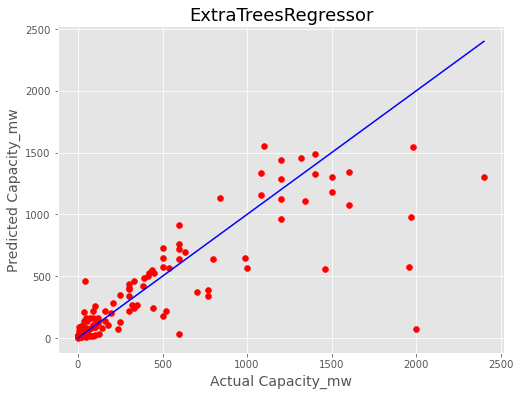

In [154]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=final_pred, color='r')
plt1 = max(max(final_pred), max(y_test))
plt2 = min(min(final_pred), min(y_test))
plt.plot([plt1, plt2], [plt1, plt2], 'b-')
plt.xlabel('Actual Capacity_mw', fontsize=14)
plt.ylabel('Predicted Capacity_mw', fontsize=14)
plt.title('ExtraTreesRegressor',fontsize=18)
plt.show()

Plotting the Final model Actual Capacity_mw vs Predicted Capacity_mw

Hence after Hyper Parameter Tuning on the final model to obtained the best r2_score 89.249% and CV score 79.4% and lowest Root Mean Square Error is: 127.93.

# Saving the model in pickle Format


In [155]:
# pickeling or serialization of a file
import pickle
filename = 'Global_Power_Plant_Capacity_mw_Regression_final_model.pkl'
pickle.dump(final_model, open(filename, 'wb'))

Saving the best regression model using pickle



# Prediction Conclusion:


In [156]:
import numpy as np
a=np.array(y_test)
predicted=np.array(final_model.predict(x_test))
df_comparison = pd.DataFrame({"original":a,"predicted":predicted},index= range(len(a)))
df_comparison

,original,predicted
0,5.00,3.8100
1,382.50,419.9205
2,768.00,390.9853
3,9.35,14.4254
4,68.80,12.2579
...,...,...
166,1200.00,1285.4500
167,60.00,31.2300
168,10.00,11.9300
169,33.00,137.1310


Hence predicted the Capacity_mw using the x_test feature columns.



In [157]:
df_comparison.to_csv('Global_Power_Plant_Capacity_mw_Regression_Prediction.csv')

Saving the predicted values in a csv file



# 2. Predicting "Fuel_Type" Target


# Seperating the Dataset into Features and Label(Fuel_Type)


In [158]:
x_df = new_df.drop("Fuel_Type", axis=1)
y_df = new_df["Fuel_Type"]

In [159]:
x_df.shape

(855, 10)

In [160]:
y_df.shape

(855,)

# Checking the Skewness of x_df


In [161]:
x_df.skew().sort_values()

geolocation_source    -2.074380
Power_plant_age        0.836962
longitude              0.917381
generation_gwh_2017    1.293269
generation_gwh_2015    1.375828
generation_gwh_2016    1.389992
generation_gwh_2018    1.421012
generation_gwh_2014    1.525975
source                 1.741703
capacity_mw            2.163488
dtype: float64

We can see that there are skewness in most of the columns



# Removing the skewness


In [162]:
skew = ['capacity_mw','longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Power_plant_age']

from sklearn.preprocessing import PowerTransformer
transfo = PowerTransformer(method='yeo-johnson')

transforming all the numerical columns apart from categorically encoded columns



In [163]:
x_df[skew] = transfo.fit_transform(x_df[skew].values)
x_df[skew].head()

,capacity_mw,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-1.677941,-0.932921,0.325398,0.350764,0.353547,0.346830,0.356994,-1.213550
1,0.214914,-0.513810,0.325398,0.350764,0.353547,0.346830,0.356994,0.184035
2,-0.278156,-2.368066,0.325398,0.350764,0.353547,0.346830,0.356994,0.184035
3,0.385690,2.447853,-1.051490,-0.738620,-0.686010,-0.906651,-0.919602,-0.448307
4,1.720052,1.253377,0.665459,1.898972,1.923558,1.534388,2.046635,-1.768974


In [164]:
x_df.skew().sort_values()

geolocation_source    -2.074380
generation_gwh_2017   -0.330764
generation_gwh_2018   -0.328334
generation_gwh_2016   -0.311647
generation_gwh_2015   -0.309409
generation_gwh_2014   -0.241358
longitude             -0.000494
Power_plant_age        0.003358
capacity_mw            0.016759
source                 1.741703
dtype: float64

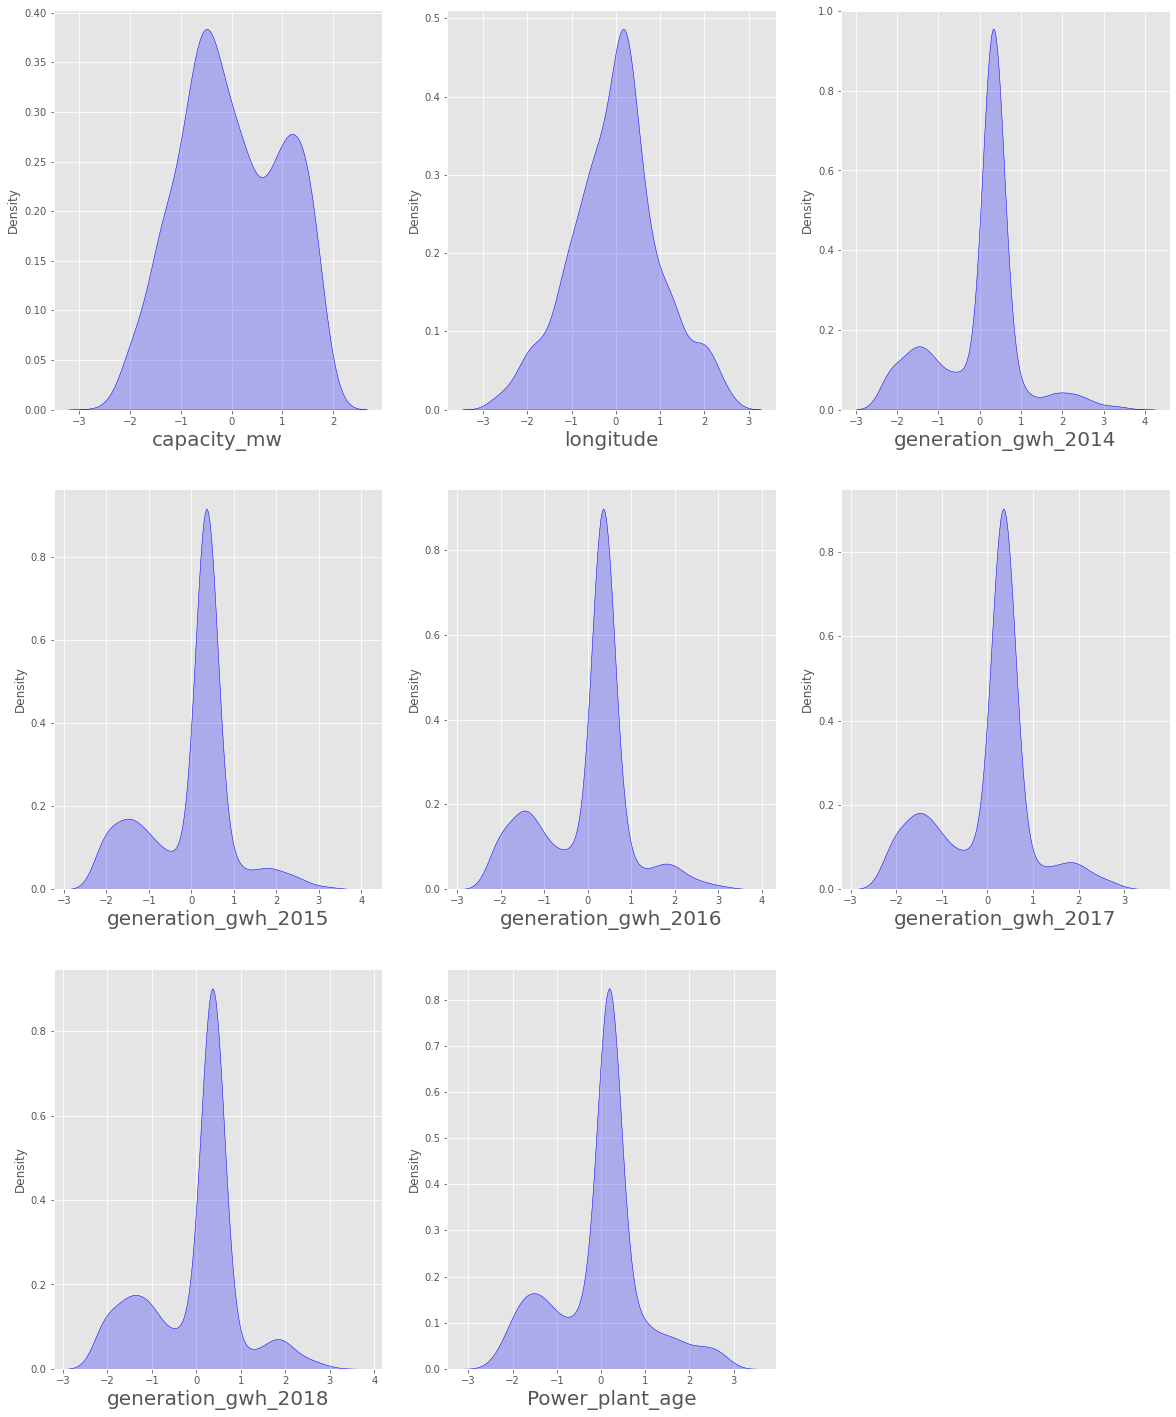

In [165]:
#Lets visualize the data

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x_df[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x_df[column],color='b',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

The dataset looks normally distributed now



# Feature Scaling


In [166]:
scaler=StandardScaler()
x_df=pd.DataFrame(scaler.fit_transform(x_df),columns=x_df.columns)
x_df

,capacity_mw,longitude,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-1.677941,-0.932921,1.402768,-1.040462,0.325398,0.350764,0.353547,0.346830,0.356994,-1.213550
1,0.214914,-0.513810,2.829096,0.406034,0.325398,0.350764,0.353547,0.346830,0.356994,0.184035
2,-0.278156,-2.368065,-0.528261,0.406034,0.325398,0.350764,0.353547,0.346830,0.356994,0.184035
3,0.385690,2.447853,-0.506318,0.406034,-1.051490,-0.738620,-0.686010,-0.906651,-0.919602,-0.448307
4,1.720052,1.253377,-0.506318,0.406034,0.665459,1.898972,1.923558,1.534388,2.046635,-1.768974
...,...,...,...,...,...,...,...,...,...,...
850,1.661330,0.216288,-0.506318,0.406034,0.325398,-2.098927,-1.419729,-0.723788,-0.861856,-1.936692
851,-1.598870,0.406355,0.700575,-2.486957,0.325398,0.350764,0.353547,0.346830,0.356994,0.184035
852,-0.510387,-0.239580,-0.528261,0.406034,0.325398,0.350764,0.353547,0.346830,0.356994,0.184035
853,0.106203,-0.772877,0.305592,0.406034,0.325398,0.350764,0.353547,0.346830,0.356994,0.184035


We have scaled the dataset.



# Checking Multicolinearity


In [168]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x_df.values,i)
              for i in range(len(x_df.columns))]
vif["Features"] = x_df.columns

# Let's check the values
vif

,VIF values,Features
0,1.591671,capacity_mw
1,1.206664,longitude
2,1.432379,source
3,1.571918,geolocation_source
4,4.134495,generation_gwh_2014
5,7.728521,generation_gwh_2015
6,10.654682,generation_gwh_2016
7,11.579109,generation_gwh_2017
8,11.338046,generation_gwh_2018
9,1.169554,Power_plant_age


All the columns has vif values less then 10, hence there is no multicolinearity that exist.



In [169]:
y_df.value_counts()

1    241
3    221
6    126
7    123
2     65
0     50
5     20
4      9
Name: Fuel_Type, dtype: int64

We can see that the target Fuel_Type has multiple classes in the mode of energy source, hence we can see that this is a multi classification problem. As the data between the classes are not balanced with 1 having 238 counts and 4 having only 9 counts, we have to do SMOTE oversampling of the data.

# SMOTE OverSampling


In [170]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_df, y_df = sm.fit_resample(x_df,y_df)

In [171]:
y_df.value_counts()

6    241
1    241
7    241
2    241
3    241
0    241
5    241
4    241
Name: Fuel_Type, dtype: int64

Here we can see that the data imbalance has been removed.



In [172]:
X = x_df   # renaming the features variable

In [173]:
X

,capacity_mw,longitude,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-1.677941,-0.932921,1.402768,-1.040462,0.325398,0.350764,0.353547,0.346830,0.356994,-1.213550
1,0.214914,-0.513810,2.829096,0.406034,0.325398,0.350764,0.353547,0.346830,0.356994,0.184035
2,-0.278156,-2.368065,-0.528261,0.406034,0.325398,0.350764,0.353547,0.346830,0.356994,0.184035
3,0.385690,2.447853,-0.506318,0.406034,-1.051490,-0.738620,-0.686010,-0.906651,-0.919602,-0.448307
4,1.720052,1.253377,-0.506318,0.406034,0.665459,1.898972,1.923558,1.534388,2.046635,-1.768974
...,...,...,...,...,...,...,...,...,...,...
1923,-1.189864,-0.093572,-0.528261,0.406034,0.325398,0.350764,0.353547,0.346830,0.356994,0.184035
1924,0.257393,0.242302,-0.528261,0.406034,0.325398,0.350764,0.353547,0.346830,0.356994,0.184035
1925,-1.846330,-1.792412,-0.528261,0.406034,0.325398,0.350764,0.353547,0.346830,0.356994,0.184035
1926,-0.198189,-1.847689,-0.528261,0.406034,0.325398,0.350764,0.353547,0.346830,0.356994,0.184035


In [174]:
Y = y_df   # renaming the target variable

In [175]:
Y

0       6
1       1
2       7
3       2
4       1
       ..
1923    7
1924    7
1925    7
1926    7
1927    7
Name: Fuel_Type, Length: 1928, dtype: int32

In [176]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

# Getting the best random state


In [177]:
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train,x_test, y_train, y_test=train_test_split(X,Y,test_size=.20, random_state=i)
    rfc=RandomForestClassifier()
    rfc.fit(x_train,y_train)
    pred=rfc.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9404145077720207  on Random_state  54


Hence we get best accuracy score as 0.94 at Random_state 54 in RandomForestClassifier



# train_test_split


In [178]:
x_train,x_test, y_train, y_test=train_test_split(X,Y,test_size=.20, random_state=142)

In [179]:
# Importing required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [180]:
# creating a function to run all the classifiers

def classifier(model, X, Y):
    x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.2, random_state=142) 
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting y_test
    pred = model.predict(x_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

# Logistic Regression


In [181]:
model = LogisticRegression()
classifier(model, X, Y)

Accuracy Score: 73.05699481865285

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.88      0.73        43
           1       0.62      0.33      0.43        55
           2       0.66      0.57      0.61        37
           3       0.58      0.38      0.46        39
           4       0.68      1.00      0.81        49
           5       0.86      0.63      0.73        49
           6       1.00      1.00      1.00        58
           7       0.72      0.93      0.81        56

    accuracy                           0.73       386
   macro avg       0.72      0.72      0.70       386
weighted avg       0.73      0.73      0.71       386

Cross Validation Score: 71.8352735347554

Accuracy Score - Cross Validation Score is 1.2217212838974518


# Naive Bayes


In [182]:
model = GaussianNB()
classifier(model, X, Y)

Accuracy Score: 55.69948186528497

Classification Report:
               precision    recall  f1-score   support

           0       0.51      1.00      0.67        43
           1       0.40      0.04      0.07        55
           2       0.00      0.00      0.00        37
           3       0.20      0.62      0.30        39
           4       0.78      0.65      0.71        49
           5       0.00      0.00      0.00        49
           6       0.76      1.00      0.87        58
           7       1.00      1.00      1.00        56

    accuracy                           0.56       386
   macro avg       0.46      0.54      0.45       386
weighted avg       0.49      0.56      0.48       386

Cross Validation Score: 54.71919790054505

Accuracy Score - Cross Validation Score is 0.9802839647399253


# SVC Classifier


In [183]:
model = SVC(kernel='rbf')
classifier(model, X, Y)

Accuracy Score: 80.56994818652849

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.86      0.79        43
           1       0.76      0.47      0.58        55
           2       0.64      0.73      0.68        37
           3       0.94      0.44      0.60        39
           4       0.89      0.98      0.93        49
           5       0.82      0.86      0.84        49
           6       1.00      1.00      1.00        58
           7       0.72      1.00      0.84        56

    accuracy                           0.81       386
   macro avg       0.81      0.79      0.78       386
weighted avg       0.82      0.81      0.79       386

Cross Validation Score: 79.14864410201197

Accuracy Score - Cross Validation Score is 1.421304084516521


In [184]:
model = SVC(kernel='linear')
classifier(model, X, Y)

Accuracy Score: 80.82901554404145

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.93      0.85        43
           1       0.73      0.44      0.55        55
           2       0.64      0.76      0.69        37
           3       0.75      0.38      0.51        39
           4       0.83      1.00      0.91        49
           5       0.90      0.88      0.89        49
           6       1.00      1.00      1.00        58
           7       0.75      0.98      0.85        56

    accuracy                           0.81       386
   macro avg       0.80      0.80      0.78       386
weighted avg       0.81      0.81      0.79       386

Cross Validation Score: 77.38564026646928

Accuracy Score - Cross Validation Score is 3.443375277572173


In [185]:
model = SVC(kernel='poly')
classifier(model, X, Y)

Accuracy Score: 72.02072538860104

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.58      0.57        43
           1       0.86      0.45      0.60        55
           2       0.76      0.59      0.67        37
           3       0.89      0.44      0.59        39
           4       0.89      0.96      0.92        49
           5       0.93      0.57      0.71        49
           6       1.00      1.00      1.00        58
           7       0.45      1.00      0.62        56

    accuracy                           0.72       386
   macro avg       0.79      0.70      0.71       386
weighted avg       0.80      0.72      0.72       386

Cross Validation Score: 71.78305632191642

Accuracy Score - Cross Validation Score is 0.2376690666846173


# Decision Tree Classifier


In [186]:
model = DecisionTreeClassifier()
classifier(model, X, Y)

Accuracy Score: 89.89637305699482

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94        43
           1       0.75      0.65      0.70        55
           2       0.78      0.78      0.78        37
           3       0.80      0.90      0.84        39
           4       0.92      0.92      0.92        49
           5       0.96      0.94      0.95        49
           6       1.00      1.00      1.00        58
           7       1.00      1.00      1.00        56

    accuracy                           0.90       386
   macro avg       0.89      0.90      0.89       386
weighted avg       0.90      0.90      0.90       386

Cross Validation Score: 87.91602180203218

Accuracy Score - Cross Validation Score is 1.9803512549626419


# KNeighbors Classifier


In [187]:
model = KNeighborsClassifier()
classifier(model, X, Y)

Accuracy Score: 84.71502590673575

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.95      0.87        43
           1       0.92      0.44      0.59        55
           2       0.68      0.81      0.74        37
           3       0.76      0.72      0.74        39
           4       0.89      0.98      0.93        49
           5       0.83      0.92      0.87        49
           6       1.00      1.00      1.00        58
           7       0.85      0.95      0.90        56

    accuracy                           0.85       386
   macro avg       0.84      0.85      0.83       386
weighted avg       0.86      0.85      0.84       386

Cross Validation Score: 85.47648206715563

Accuracy Score - Cross Validation Score is -0.7614561604198826


# SGD Classifier


In [188]:
model = SGDClassifier()
classifier(model, X, Y)

Accuracy Score: 62.95336787564767

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.77      0.61        43
           1       1.00      0.15      0.25        55
           2       0.31      0.46      0.37        37
           3       0.43      0.38      0.41        39
           4       0.64      0.96      0.76        49
           5       0.69      0.22      0.34        49
           6       1.00      1.00      1.00        58
           7       0.72      0.96      0.82        56

    accuracy                           0.63       386
   macro avg       0.66      0.61      0.57       386
weighted avg       0.69      0.63      0.59       386

Cross Validation Score: 64.00121122400915

Accuracy Score - Cross Validation Score is -1.0478433483614822


# Random Forest Classifier


In [189]:
model = RandomForestClassifier(random_state=142)
classifier(model, X, Y)

Accuracy Score: 91.96891191709845

Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        43
           1       0.88      0.69      0.78        55
           2       0.76      0.86      0.81        37
           3       0.94      0.82      0.88        39
           4       0.89      0.98      0.93        49
           5       0.94      0.98      0.96        49
           6       1.00      1.00      1.00        58
           7       1.00      1.00      1.00        56

    accuracy                           0.92       386
   macro avg       0.91      0.92      0.91       386
weighted avg       0.92      0.92      0.92       386

Cross Validation Score: 91.33786420833052

Accuracy Score - Cross Validation Score is 0.6310477087679374


In [190]:
model = RandomForestClassifier()
classifier(model, X, Y)

Accuracy Score: 91.45077720207254

Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        43
           1       0.86      0.67      0.76        55
           2       0.76      0.86      0.81        37
           3       0.91      0.82      0.86        39
           4       0.89      0.96      0.92        49
           5       0.94      0.98      0.96        49
           6       1.00      1.00      1.00        58
           7       1.00      1.00      1.00        56

    accuracy                           0.91       386
   macro avg       0.91      0.91      0.91       386
weighted avg       0.92      0.91      0.91       386

Cross Validation Score: 91.33772962788507

Accuracy Score - Cross Validation Score is 0.11304757418747613


# ExtraTrees Classifier


In [191]:
model = ExtraTreesClassifier()
classifier(model, X, Y)

Accuracy Score: 92.48704663212435

Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        43
           1       0.88      0.65      0.75        55
           2       0.75      0.89      0.81        37
           3       0.92      0.90      0.91        39
           4       0.94      0.98      0.96        49
           5       0.96      0.98      0.97        49
           6       1.00      1.00      1.00        58
           7       1.00      1.00      1.00        56

    accuracy                           0.92       386
   macro avg       0.92      0.93      0.92       386
weighted avg       0.93      0.92      0.92       386

Cross Validation Score: 92.58232958751093

Accuracy Score - Cross Validation Score is -0.09528295538657972


# AdaBoost Classifier


In [192]:
model = AdaBoostClassifier()
classifier(model, X, Y)

Accuracy Score: 31.34715025906736

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.53      0.55        43
           1       0.03      0.04      0.03        55
           2       0.00      0.00      0.00        37
           3       0.17      1.00      0.29        39
           4       0.00      0.00      0.00        49
           5       0.00      0.00      0.00        49
           6       1.00      0.98      0.99        58
           7       0.00      0.00      0.00        56

    accuracy                           0.31       386
   macro avg       0.22      0.32      0.23       386
weighted avg       0.24      0.31      0.25       386

Cross Validation Score: 27.90552452728618

Accuracy Score - Cross Validation Score is 3.44162573178118


# Gradient Boosting Classifier


In [193]:
model = GradientBoostingClassifier()
classifier(model, X, Y)

Accuracy Score: 91.45077720207254

Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        43
           1       0.86      0.69      0.77        55
           2       0.78      0.86      0.82        37
           3       0.94      0.79      0.86        39
           4       0.86      0.98      0.91        49
           5       0.96      0.98      0.97        49
           6       1.00      0.98      0.99        58
           7       0.98      1.00      0.99        56

    accuracy                           0.91       386
   macro avg       0.91      0.91      0.91       386
weighted avg       0.92      0.91      0.91       386

Cross Validation Score: 90.35273534755402

Accuracy Score - Cross Validation Score is 1.0980418545185273


Comparing all the above the ExtraTreesClassifier gives the best results since the Accuracy Score - Cross Validation Score is the least along with higher Cross Validation Score and the highest Accuracy Score comparing all the models.

# Hyper Parameter Tuning


In [194]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.20,random_state=142)


In [195]:
#ExtraTreesClassifier?

In [196]:
# creating parameters list to pass into GridSearchCV

parameters = {'criterion' : ['gini', 'entropy'],
              'max_features' : ['auto', 'sqrt', 'log2'],
              'n_jobs' : [5, 10, 15]}

In [197]:
GCV = GridSearchCV(ExtraTreesClassifier(), parameters, cv=5)

In [198]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_jobs': [5, 10, 15]})

In [199]:
GCV.best_params_      # printing best parameters found by GridSearchCV

{'criterion': 'gini', 'max_features': 'sqrt', 'n_jobs': 10}

We got the best parameters using Gridsearch CV



In [200]:
final_modelc = ExtraTreesClassifier(criterion = 'gini', max_features = 'log2', n_jobs = 5)   # final model with best parameters

In [201]:
final_fitc = final_modelc.fit(x_train,y_train)   # final fit

In [202]:
final_predc = final_modelc.predict(x_test)   # predicting with best parameters

In [203]:
best_acc_score = (accuracy_score(y_test, final_predc))*100    # checking accuracy score
print("The Accuracy Score for the Best Model is ", best_acc_score)

The Accuracy Score for the Best Model is  92.48704663212435


We successfully performed the Hyper Parameter Tuning on the Final Model.



In [204]:
# Final Cross Validation Score
final_cv_score = (cross_val_score(final_modelc, X, Y, cv=5).mean())*100
print("Cross Validation Score:", final_cv_score)

Cross Validation Score: 92.27171791938632


We got final accuracy score of 92.487% and Cross Validation Score of 92.27% which is good



In [205]:
x_test.shape

(386, 10)

In [206]:
y_test.shape

(386,)

In [207]:
x_train.shape

(1542, 10)

In [208]:
y_train.shape

(1542,)

In [209]:
# Final Classification Report
final_class_report = classification_report(y_test, final_predc)
print("\nClassification Report:\n", final_class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.96        43
           1       0.86      0.65      0.74        55
           2       0.82      0.86      0.84        37
           3       0.90      0.90      0.90        39
           4       0.92      0.98      0.95        49
           5       0.94      1.00      0.97        49
           6       1.00      1.00      1.00        58
           7       0.98      1.00      0.99        56

    accuracy                           0.92       386
   macro avg       0.92      0.92      0.92       386
weighted avg       0.92      0.92      0.92       386



In [210]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

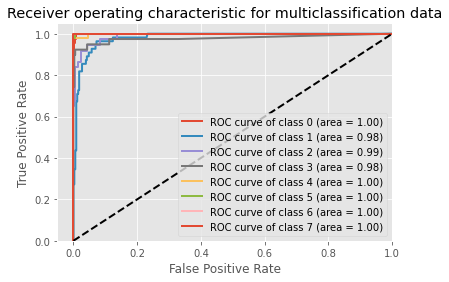

In [211]:
classifier = OneVsRestClassifier(final_modelc)
y_score = classifier.fit(x_train, y_train).predict_proba(x_test)

#Binarize the output
y_test_bin  = label_binarize(y_test, classes=[0,1,2,3,4,5,6,7])
n_classes = 8

# Compute ROC curve and AUC for all the classes
false_positive_rate = dict()
true_positive_rate = dict()
roc_auc = dict()
for i in range(n_classes):
    false_positive_rate[i], true_positive_rate[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(false_positive_rate[i], true_positive_rate[i])
    
   
for i in range(n_classes):
    plt.plot(false_positive_rate[i], true_positive_rate[i], lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multiclassification data')
plt.legend(loc="lower right")
plt.show()

Hence we got AUC ROC curve for all 8 classes which is either 0.98 or 1 which is good



# Saving the model in pickle Format


In [212]:
# pickeling or serialization of a file
import pickle
filenamec = 'Global_Power_Plant_Fuel_Type_Classification_final_model.pkl'
pickle.dump(final_modelc, open(filenamec, 'wb'))

# Prediction Conclusion:


In [213]:
import numpy as np
ac=np.array(y_test)
predictedc=np.array(final_modelc.predict(x_test))
df_comparisonc = pd.DataFrame({"original":ac,"predicted":predictedc},index= range(len(ac)))
df_comparisonc

,original,predicted
0,4,4
1,0,0
2,6,6
3,3,5
4,1,1
...,...,...
381,6,6
382,6,6
383,2,2
384,7,7


Hence predicted the 'Fuel_Type' using the x_test feature columns.



In [214]:
df_comparisonc.to_csv('Global_Power_Plant_Fuel_Type_Classification_Prediction.csv')

Saving the predicted values in a csv file



# Thank You